# Slovakia EDA

# This notebook contains,
 1. Data loading and Cleaning.
 2. Exploratory Data Analysis. 
 3. Modeling.

## Importing the required libraries!

In [1]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import missingno as msno

# Loading the dataset

In [2]:
# data_path = "C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv"

df = pd.read_csv(r"C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv")
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24-02-2020          1.0        1.0   
1      AFG      Asia  Afghanistan  25-02-2020          1.0        0.0   
2      AFG      Asia  Afghanistan  26-02-2020          1.0        0.0   
3      AFG      Asia  Afghanistan  27-02-2020          1.0        0.0   
4      AFG      Asia  Afghanistan  28-02-2020          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

In [3]:
# size of the dataset
df.shape

(74866, 59)

In [4]:
# displaying the columns and the very basic info using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

## We'll be focusing on the dataset of Slovakia.

In [5]:
x = df.groupby(df.location)
Slovakia = x.get_group("Slovakia")

# Slovakia EDA

### here's the dataset for the country Slovakia 

In [6]:
Slovakia

iso_code continent  location        date  total_cases  new_cases  \
60393      SVK    Europe  Slovakia  06-03-2020          1.0        1.0   
60394      SVK    Europe  Slovakia  07-03-2020          1.0        0.0   
60395      SVK    Europe  Slovakia  08-03-2020          3.0        2.0   
60396      SVK    Europe  Slovakia  09-03-2020          3.0        0.0   
60397      SVK    Europe  Slovakia  10-03-2020          7.0        4.0   
...        ...       ...       ...         ...          ...        ...   
60762      SVK    Europe  Slovakia  10-03-2021     329593.0     3600.0   
60763      SVK    Europe  Slovakia  11-03-2021     331571.0     1978.0   
60764      SVK    Europe  Slovakia  12-03-2021     333872.0     2301.0   
60765      SVK    Europe  Slovakia  13-03-2021     336235.0     2363.0   
60766      SVK    Europe  Slovakia  14-03-2021     337503.0     1268.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
60393                 NaN           NaN         NaN                  NaN  ...   
60394                 NaN           NaN         NaN                  NaN  ...   
60395                 NaN           NaN         NaN                  NaN  ...   
60396                 NaN           NaN         NaN                  NaN  ...   
60397                 NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
60762            2176.286        8146.0       109.0               93.857  ...   
60763            2058.857        8244.0        98.0               97.714  ...   
60764            2041.429        8346.0       102.0               97.286  ...   
60765            2018.714        8440.0        94.0              100.143  ...   
60766            2016.143        8528.0        88.0               98.857  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
60393       30155.152              0.7                287.959   
60394       30155.152              0.7                287.959   
60395       30155.152              0.7                287.959   
60396       30155.152              0.7                287.959   
60397       30155.152              0.7                287.959   
...               ...              ...                    ...   
60762       30155.152              0.7                287.959   
60763       30155.152              0.7                287.959   
60764       30155.152              0.7                287.959   
60765       30155.152              0.7                287.959   
60766       30155.152              0.7                287.959   

       diabetes_prevalence  female_smokers  male_smokers  \
60393                 7.29            23.1          37.7   
60394                 7.29            23.1          37.7   
60395                 7.29            23.1          37.7   
60396                 7.29            23.1          37.7   
60397                 7.29            23.1          37.7   
...                    ...             ...           ...   
60762                 7.29            23.1          37.7   
60763                 7.29            23.1          37.7   
60764                 7.29            23.1          37.7   
60765                 7.29            23.1          37.7   
60766                 7.29            23.1          37.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
60393                     NaN                        5.82            77.54   
60394                     NaN                        5.82            77.54   
60395                     NaN                        5.82            77.54   
60396                     NaN                        5.82            77.54   
60397                     NaN                        5.82            77.54   
...                       ...                         ...              ...   
60762                     NaN                        5.82            77.54   
60763             

### We change the index number starting from 60,393-60,766 to 0-373 for easy understaning and readability.

In [7]:
Slovakia=Slovakia.reset_index()
Slovakia.drop('index', axis=1, inplace=True)

In [8]:
Slovakia

iso_code continent  location        date  total_cases  new_cases  \
0        SVK    Europe  Slovakia  06-03-2020          1.0        1.0   
1        SVK    Europe  Slovakia  07-03-2020          1.0        0.0   
2        SVK    Europe  Slovakia  08-03-2020          3.0        2.0   
3        SVK    Europe  Slovakia  09-03-2020          3.0        0.0   
4        SVK    Europe  Slovakia  10-03-2020          7.0        4.0   
..       ...       ...       ...         ...          ...        ...   
369      SVK    Europe  Slovakia  10-03-2021     329593.0     3600.0   
370      SVK    Europe  Slovakia  11-03-2021     331571.0     1978.0   
371      SVK    Europe  Slovakia  12-03-2021     333872.0     2301.0   
372      SVK    Europe  Slovakia  13-03-2021     336235.0     2363.0   
373      SVK    Europe  Slovakia  14-03-2021     337503.0     1268.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                   NaN           NaN         NaN                  NaN  ...   
1                   NaN           NaN         NaN                  NaN  ...   
2                   NaN           NaN         NaN                  NaN  ...   
3                   NaN           NaN         NaN                  NaN  ...   
4                   NaN           NaN         NaN                  NaN  ...   
..                  ...           ...         ...                  ...  ...   
369            2176.286        8146.0       109.0               93.857  ...   
370            2058.857        8244.0        98.0               97.714  ...   
371            2041.429        8346.0       102.0               97.286  ...   
372            2018.714        8440.0        94.0              100.143  ...   
373            2016.143        8528.0        88.0               98.857  ...   

     gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0         30155.152              0.7                287.959   
1         30155.152              0.7                287.959   
2         30155.152              0.7                287.959   
3         30155.152              0.7                287.959   
4         30155.152              0.7                287.959   
..              ...              ...                    ...   
369       30155.152              0.7                287.959   
370       30155.152              0.7                287.959   
371       30155.152              0.7                287.959   
372       30155.152              0.7                287.959   
373       30155.152              0.7                287.959   

     diabetes_prevalence  female_smokers  male_smokers  \
0                   7.29            23.1          37.7   
1                   7.29            23.1          37.7   
2                   7.29            23.1          37.7   
3                   7.29            23.1          37.7   
4                   7.29            23.1          37.7   
..                   ...             ...           ...   
369                 7.29            23.1          37.7   
370                 7.29            23.1          37.7   
371                 7.29            23.1          37.7   
372                 7.29            23.1          37.7   
373                 7.29            23.1          37.7   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                       NaN                        5.82            77.54   
1                       NaN                        5.82            77.54   
2                       NaN                        5.82            77.54   
3                       NaN                        5.82            77.54   
4                       NaN                        5.82            77.54   
..                      ...                         ...              ...   
369                     NaN                        5.82            77.54   
370                     NaN                        5.82            77.54   
371                     NaN                        5

In [9]:
Slovakia.head()

iso_code continent  location        date  total_cases  new_cases  \
0      SVK    Europe  Slovakia  06-03-2020          1.0        1.0   
1      SVK    Europe  Slovakia  07-03-2020          1.0        0.0   
2      SVK    Europe  Slovakia  08-03-2020          3.0        2.0   
3      SVK    Europe  Slovakia  09-03-2020          3.0        0.0   
4      SVK    Europe  Slovakia  10-03-2020          7.0        4.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       30155.152              0.7                287.959   
1       30155.152              0.7                287.959   
2       30155.152              0.7                287.959   
3       30155.152              0.7                287.959   
4       30155.152              0.7                287.959   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 7.29            23.1          37.7                     NaN   
1                 7.29            23.1          37.7                     NaN   
2                 7.29            23.1          37.7                     NaN   
3                 7.29            23.1          37.7                     NaN   
4                 7.29            23.1          37.7                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                        5.82            77.54                     0.86  
1                        5.82            77.54                     0.86  
2                        5.82            77.54                     0.86  
3                        5.82            77.54                     0.86  
4                        5.82            77.54                     0.86  

[5 rows x 59 columns]

In [10]:
Slovakia.tail()

iso_code continent  location        date  total_cases  new_cases  \
369      SVK    Europe  Slovakia  10-03-2021     329593.0     3600.0   
370      SVK    Europe  Slovakia  11-03-2021     331571.0     1978.0   
371      SVK    Europe  Slovakia  12-03-2021     333872.0     2301.0   
372      SVK    Europe  Slovakia  13-03-2021     336235.0     2363.0   
373      SVK    Europe  Slovakia  14-03-2021     337503.0     1268.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
369            2176.286        8146.0       109.0               93.857  ...   
370            2058.857        8244.0        98.0               97.714  ...   
371            2041.429        8346.0       102.0               97.286  ...   
372            2018.714        8440.0        94.0              100.143  ...   
373            2016.143        8528.0        88.0               98.857  ...   

     gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
369       30155.152              0.7                287.959   
370       30155.152              0.7                287.959   
371       30155.152              0.7                287.959   
372       30155.152              0.7                287.959   
373       30155.152              0.7                287.959   

     diabetes_prevalence  female_smokers  male_smokers  \
369                 7.29            23.1          37.7   
370                 7.29            23.1          37.7   
371                 7.29            23.1          37.7   
372                 7.29            23.1          37.7   
373                 7.29            23.1          37.7   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
369                     NaN                        5.82            77.54   
370                     NaN                        5.82            77.54   
371                     NaN                        5.82            77.54   
372                     NaN                        5.82            77.54   
373                     NaN                        5.82            77.54   

     human_development_index  
369                     0.86  
370                     0.86  
371                     0.86  
372                     0.86  
373                     0.86  

[5 rows x 59 columns]

In [11]:
# size of the dataset for country Slovakia
print(Slovakia.shape)

(374, 59)


## Displaying the dictionary of columns present in the dataset

In [12]:
Slovakia.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

## The method Slovakia.info() information about the given DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [13]:
Slovakia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               374 non-null    object 
 1   continent                              374 non-null    object 
 2   location                               374 non-null    object 
 3   date                                   374 non-null    object 
 4   total_cases                            374 non-null    float64
 5   new_cases                              374 non-null    float64
 6   new_cases_smoothed                     369 non-null    float64
 7   total_deaths                           348 non-null    float64
 8   new_deaths                             348 non-null    float64
 9   new_deaths_smoothed                    369 non-null    float64
 10  total_cases_per_million                374 non-null    float64
 11  new_ca

## We now find the null values present in the given series of object. Using the 'isnull().sum()' function, one can find the number of missing values per column.

In [14]:
Slovakia.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              26
new_deaths                                26
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  26
new_deaths_per_million                    26
new_deaths_smoothed_per_million            5
reproduction_rate                         14
icu_patients                             374
icu_patients_per_million                 374
hosp_patients                             62
hosp_patients_per_million                 62
weekly_icu_admissions                    374
weekly_icu

## We can also determine the null values in-terms of percentage

In [15]:
features_with_na=[features for features in Slovakia.columns if Slovakia[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(Slovakia[feature].isnull().mean(), 4),  ' % missing values')

new_cases_smoothed 0.0134  % missing values
total_deaths 0.0695  % missing values
new_deaths 0.0695  % missing values
new_deaths_smoothed 0.0134  % missing values
new_cases_smoothed_per_million 0.0134  % missing values
total_deaths_per_million 0.0695  % missing values
new_deaths_per_million 0.0695  % missing values
new_deaths_smoothed_per_million 0.0134  % missing values
reproduction_rate 0.0374  % missing values
icu_patients 1.0  % missing values
icu_patients_per_million 1.0  % missing values
hosp_patients 0.1658  % missing values
hosp_patients_per_million 0.1658  % missing values
weekly_icu_admissions 1.0  % missing values
weekly_icu_admissions_per_million 1.0  % missing values
weekly_hosp_admissions 1.0  % missing values
weekly_hosp_admissions_per_million 1.0  % missing values
new_tests_smoothed 0.0214  % missing values
new_tests_smoothed_per_thousand 0.0214  % missing values
positive_rate 0.0187  % missing values
tests_per_case 0.0348  % missing values
total_vaccinations 0.8155  % 

## We are findingt the recoverd cases in the country Slovakia using the formula 
   ## recovered cases = [total cases]-[total deaths]-[New cases] 

In [16]:
Slovakia['recovered_cases'] = Slovakia['total_cases']-Slovakia['total_deaths'] - Slovakia['new_cases']
Slovakia.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count     374.000000   374.000000          369.000000    348.000000   
mean    73280.117647   902.414439          897.614409   1290.652299   
std    103901.093482  1176.685369         1025.444700   2243.073107   
min         1.000000     0.000000            0.857000      1.000000   
25%      1528.500000    14.000000           18.714000     28.000000   
50%      4807.500000   117.500000          131.143000     39.500000   
75%    126545.500000  1843.750000         1956.429000   1393.500000   
max    337503.000000  6315.000000         3259.857000   8528.000000   

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  348.000000           369.000000               374.000000   
mean    24.505747            22.323672             13422.144572   
std     38.447726            34.216058             19030.748612   
min      0.000000             0.000000                 0.183000   
25%      0.000000             0.000000               279.963500   
50%      0.500000             0.714000               880.552500   
75%     35.750000            26.571000             23178.346750   
max    204.000000           102.429000             61817.778000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count             374.000000                      369.000000   
mean              165.288171                      164.408973   
std               215.524256                      187.822644   
min                 0.000000                        0.157000   
25%                 2.564000                        3.428000   
50%                21.521500                       24.020000   
75%               337.705250                      358.344000   
max              1156.669000                      597.082000   

       total_deaths_per_million  ...  extreme_poverty  cardiovasc_death_rate  \
count                348.000000  ...     3.740000e+02           3.740000e+02   
mean                 236.398750  ...     7.000000e-01           2.879590e+02   
std                  410.846089  ...     4.780354e-15           1.650667e-12   
min                    0.183000  ...     7.000000e-01           2.879590e+02   
25%                    5.129000  ...     7.000000e-01           2.879590e+02   
50%                    7.234500  ...     7.000000e-01           2.879590e+02   
75%                  255.236250  ...     7.000000e-01           2.879590e+02   
max                 1562.007000  ...     7.000000e-01           2.879590e+02   

       diabetes_prevalence  female_smokers  male_smokers  \
count         3.740000e+02    3.740000e+02  3.740000e+02   
mean          7.290000e+00    2.310000e+01  3.770000e+01   
std           2.757041e-14    1.600863e-13  2.276783e-13   
min           7.290000e+00    2.310000e+01  3.770000e+01   
25%           7.290000e+00    2.310000e+01  3.770000e+01   
50%           7.290000e+00    2.310000e+01  3.770000e+01   
75%           7.290000e+00    2.310000e+01  3.770000e+01   
max           7.290000e+00    2.310000e+01  3.770000e+01   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count                     0.0                3.740000e+02     3.740000e+02   
mean                      NaN                5.820000e+00     7.754000e+01   
std                       NaN                1.067242e-14     6.118853e-13   
min                       NaN                5.820000e+00     7.754000e+01   
25%                       NaN                5.820000e+00     7.754000e+01   
50%                       NaN                5.820000e+00     7.754000e+01   
75%                       NaN                5.820000e+00     7.754000e+01   
max                       NaN                5.820000e+00     7.754000e+01   

       human_development_index  recovered_cases  
count             3.740000e+02       348.000000  
mean              8.600000e-01     76485.738506  
std               8.004314e-15    102726.143298  
min               8.600

## Using the heatmap, we can clearly locate the null values present in each column. As the heatmap denotes the null values in a different color as shown below. 

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

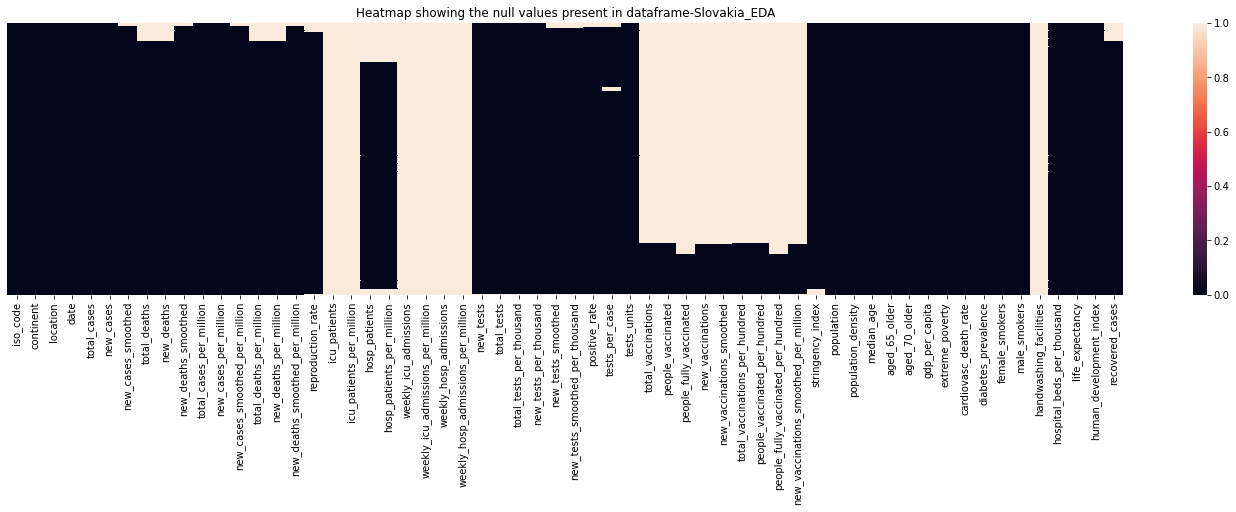

In [17]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

<AxesSubplot:>

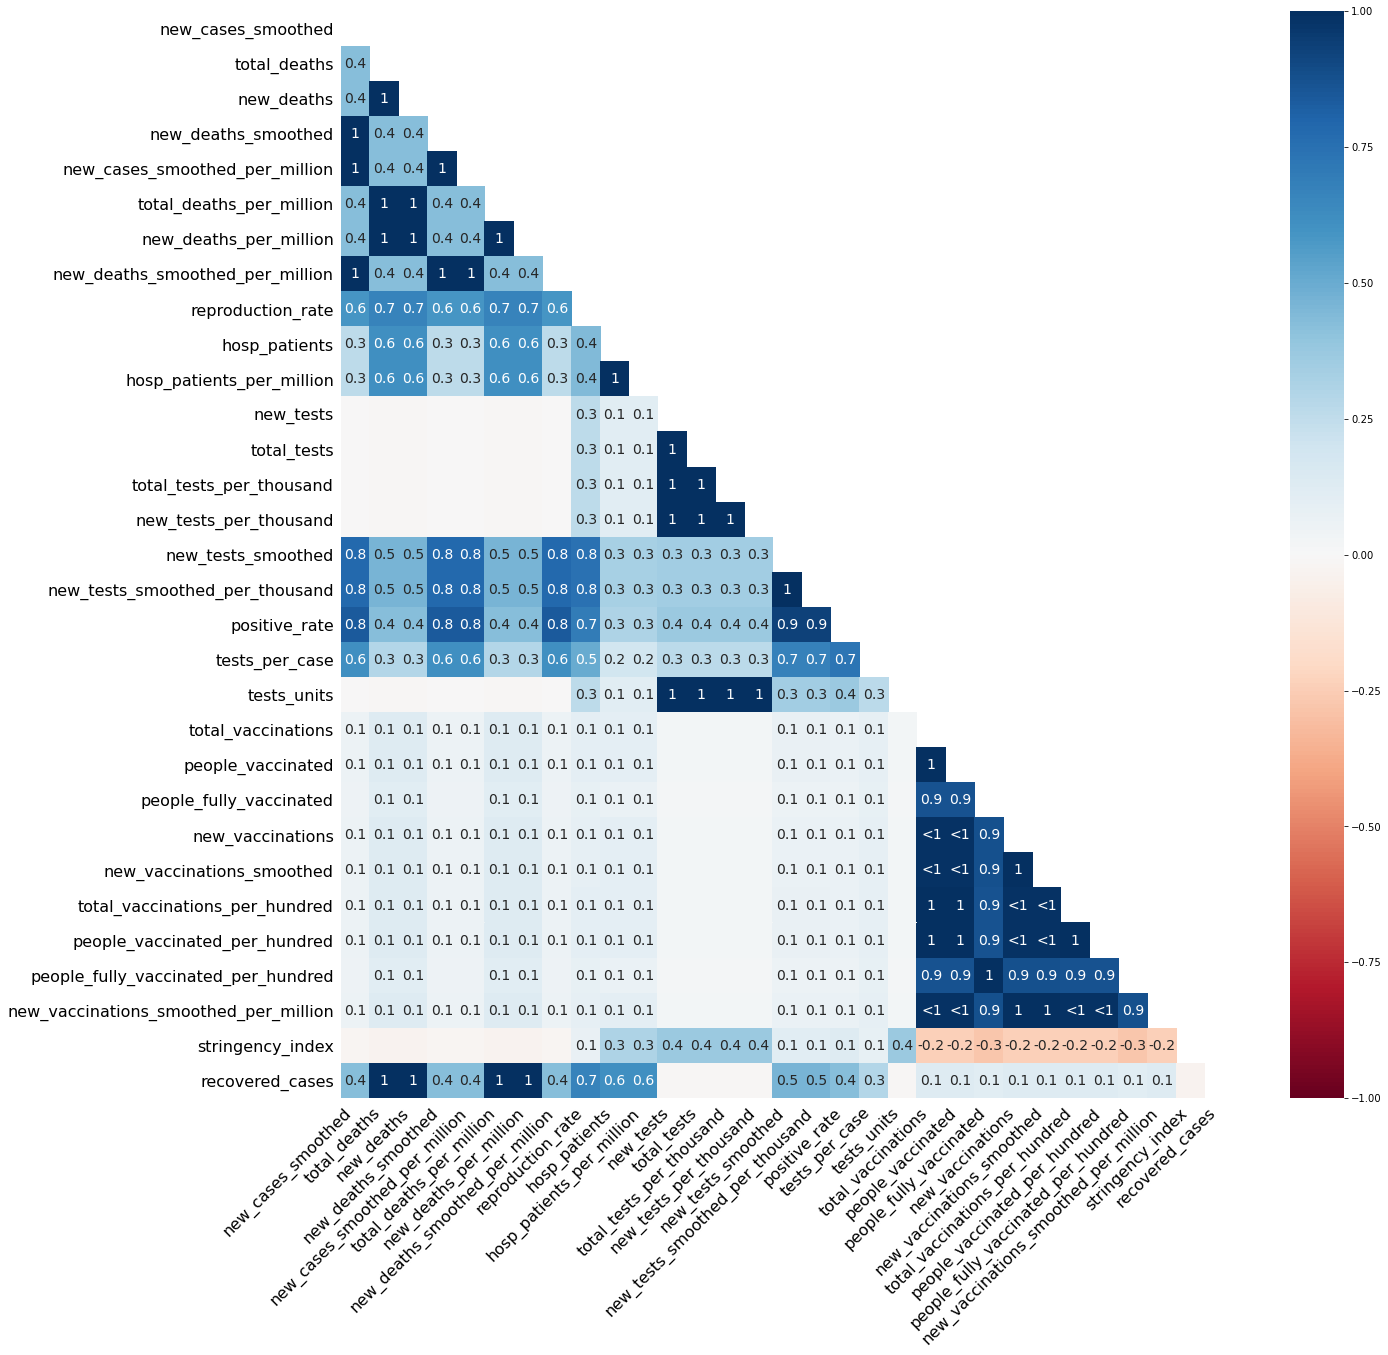

In [18]:
msno.heatmap(Slovakia,figsize=(20,20))

## From the above heatmap, we can see that there are many values near to 0 which means that there is no dependence between the occurence of missing values, As we can the null values present in few columns, and also few coulmns are entirely having null value, so we can drop those column using drop() function

In [19]:
Slovakia.drop(columns=['icu_patients', 'icu_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                       'weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
                       'handwashing_facilities'], axis =1 ,inplace =True)
Slovakia.drop(columns=['weekly_hosp_admissions'], axis =1 ,inplace =True)

After removing some columns which had the maximum number of null values, we can see it in the following heatmap

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

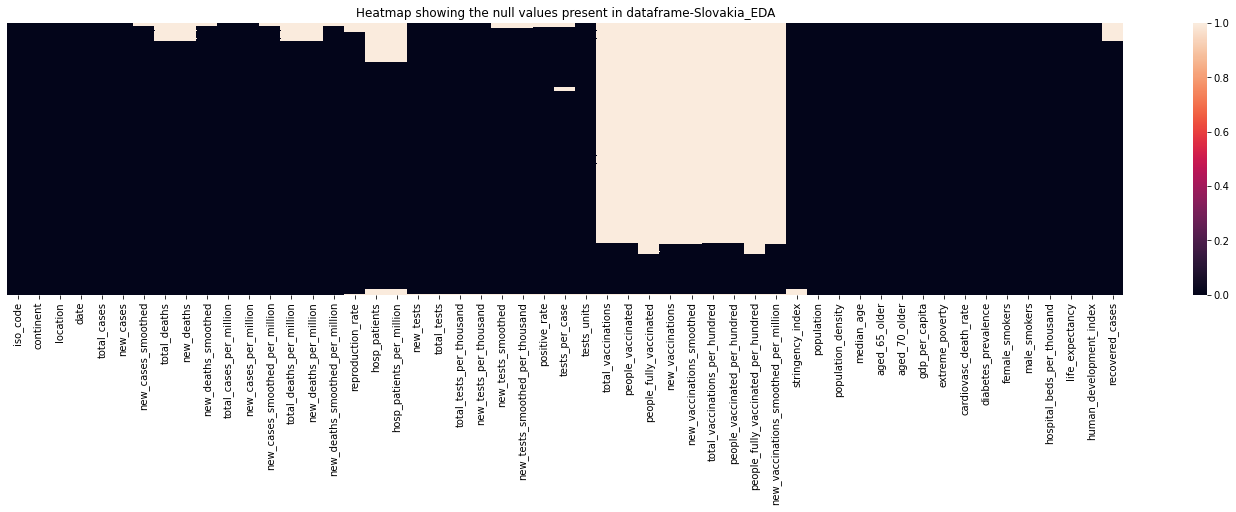

In [20]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

### After removing the columns which had the maximum number of null values, there are some more columns which are having the null values, so we can clearly understand them using the distrubution plot as folllows

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean      73280.117647
std      103901.093482
min           1.000000
25%        1528.500000
50%        4807.500000
75%      126545.500000
max      337503.000000
Name: total_cases, dtype: float64

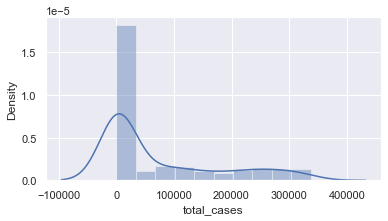

In [22]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_cases)
Slovakia['total_cases'].describe()

## 1. Distrubution plot for total vaccinations provided

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count        69.000000
mean     256619.318841
std      187720.953146
min           0.000000
25%       95573.000000
50%      217367.000000
75%      411626.000000
max      620928.000000
Name: total_vaccinations, dtype: float64

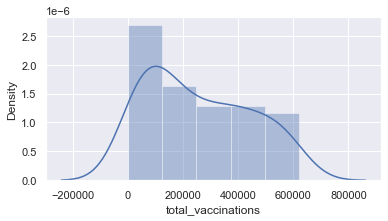

In [23]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations)
Slovakia['total_vaccinations'].describe()

## 2. Distrubution plot showing the number of people vaccinated

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count        69.000000
mean     192372.898551
std      119518.427978
min           0.000000
25%       93018.000000
50%      186235.000000
75%      295746.000000
max      406262.000000
Name: people_vaccinated, dtype: float64

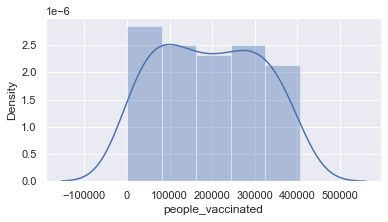

In [24]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_vaccinated)
Slovakia['people_vaccinated'].describe()

## 3. Distrubution plot for total vaccinations provided

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count        69.000000
mean     256619.318841
std      187720.953146
min           0.000000
25%       95573.000000
50%      217367.000000
75%      411626.000000
max      620928.000000
Name: total_vaccinations, dtype: float64

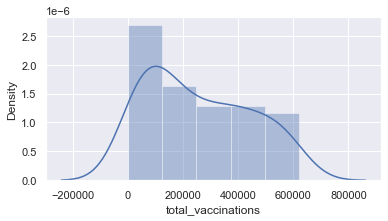

In [25]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations)
Slovakia['total_vaccinations'].describe()

## 4. Distrubution plot shows that people who are fully vaccinated

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count        55.000000
mean      80600.054545
std       70302.803778
min         582.000000
25%       10990.500000
50%       62682.000000
75%      133686.000000
max      214666.000000
Name: people_fully_vaccinated, dtype: float64

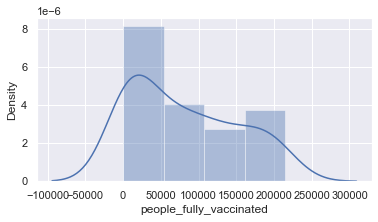

In [26]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_fully_vaccinated)
Slovakia['people_fully_vaccinated'].describe()

## 5. Distrubution plot for the new_vaccinations available

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       68.000000
mean      9131.294118
std       5081.224259
min          0.000000
25%       6641.500000
50%       9880.000000
75%      13001.000000
max      23746.000000
Name: new_vaccinations, dtype: float64

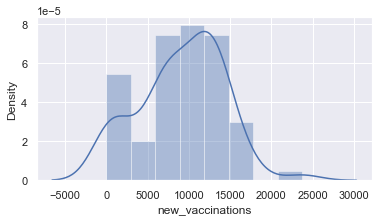

In [27]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations)
Slovakia['new_vaccinations'].describe()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       68.000000
mean      8685.544118
std       3068.332293
min        425.000000
25%       5767.750000
50%       9743.000000
75%      11165.000000
max      13711.000000
Name: new_vaccinations_smoothed, dtype: float64

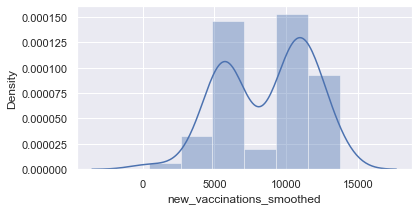

In [28]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations_smoothed)
Slovakia['new_vaccinations_smoothed'].describe()

## 6. Distrubution plot for total_vaccinations_per_hundred

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    69.000000
mean      4.700000
std       3.437822
min       0.000000
25%       1.750000
50%       3.980000
75%       7.540000
max      11.370000
Name: total_vaccinations_per_hundred, dtype: float64

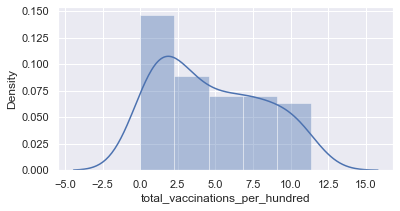

In [29]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations_per_hundred)
Slovakia['total_vaccinations_per_hundred'].describe()

In [30]:
## 7. Distrubution plot for 

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    69.000000
mean      3.523333
std       2.188997
min       0.000000
25%       1.700000
50%       3.410000
75%       5.420000
max       7.440000
Name: people_vaccinated_per_hundred, dtype: float64

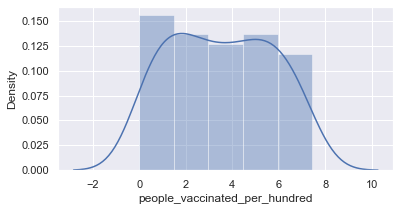

In [31]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_vaccinated_per_hundred)
Slovakia['people_vaccinated_per_hundred'].describe()

## 8. Distrubution plot for people_fully_vaccinated_per_hundred

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    55.000000
mean      1.476364
std       1.287746
min       0.010000
25%       0.200000
50%       1.150000
75%       2.450000
max       3.930000
Name: people_fully_vaccinated_per_hundred, dtype: float64

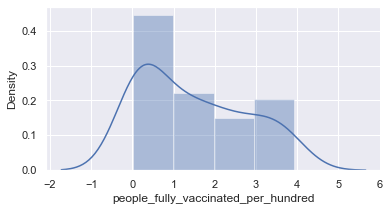

In [32]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_fully_vaccinated_per_hundred)
Slovakia['people_fully_vaccinated_per_hundred'].describe()

## 9. Distrubution plot for new_vaccinations_smoothed_per_million

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      68.000000
mean     1590.882353
std       561.953696
min        78.000000
25%      1056.500000
50%      1784.500000
75%      2044.750000
max      2511.000000
Name: new_vaccinations_smoothed_per_million, dtype: float64

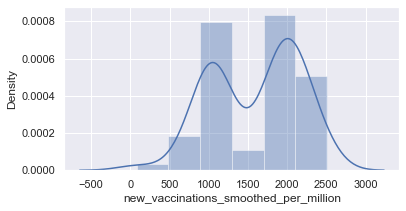

In [33]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations_smoothed_per_million)
Slovakia['new_vaccinations_smoothed_per_million'].describe()

In [34]:
Slovakia.describe().loc[:,['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations',
                           'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                           'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','recovered_cases']]

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count           69.000000          69.000000                55.000000   
mean        256619.318841      192372.898551             80600.054545   
std         187720.953146      119518.427978             70302.803778   
min              0.000000           0.000000               582.000000   
25%          95573.000000       93018.000000             10990.500000   
50%         217367.000000      186235.000000             62682.000000   
75%         411626.000000      295746.000000            133686.000000   
max         620928.000000      406262.000000            214666.000000   

       new_vaccinations  new_vaccinations_smoothed  \
count         68.000000                  68.000000   
mean        9131.294118                8685.544118   
std         5081.224259                3068.332293   
min            0.000000                 425.000000   
25%         6641.500000                5767.750000   
50%         9880.000000                9743.000000   
75%        13001.000000               11165.000000   
max        23746.000000               13711.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                       69.000000                      69.000000   
mean                         4.700000                       3.523333   
std                          3.437822                       2.188997   
min                          0.000000                       0.000000   
25%                          1.750000                       1.700000   
50%                          3.980000                       3.410000   
75%                          7.540000                       5.420000   
max                         11.370000                       7.440000   

       people_fully_vaccinated_per_hundred  \
count                            55.000000   
mean                              1.476364   
std                               1.287746   
min                               0.010000   
25%                               0.200000   
50%                               1.150000   
75%                               2.450000   
max                               3.930000   

       new_vaccinations_smoothed_per_million  recovered_cases  
count                              68.000000       348.000000  
mean                             1590.882353     76485.738506  
std                               561.953696    102726.143298  
min                                78.000000       362.000000  
25%                              1056.500000      1611.750000  
50%                              1784.500000      6677.000000  
75%                              2044.750000    138455.750000  
max                              2511.000000    327707.000000

## The following heatmap shows that its the correlation heatmap representing the country Slovakia. The correlation matrix contains the number of vaccinations which were available and how many people are vaccinated partially and how many people are fully vaccinated

total_vaccinations  people_vaccinated  \
total_vaccinations                               1.000000           0.992435   
people_vaccinated                                0.992435           1.000000   
people_fully_vaccinated                          0.992550           0.977998   
new_vaccinations                                 0.548058           0.560668   
new_vaccinations_smoothed                        0.925516           0.947707   
total_vaccinations_per_hundred                   1.000000           0.992439   
people_vaccinated_per_hundred                    0.992431           0.999999   
people_fully_vaccinated_per_hundred              0.992554           0.978007   
new_vaccinations_smoothed_per_million            0.925507           0.947710   
recovered_cases                                  0.988360           0.997845   

                                       people_fully_vaccinated  \
total_vaccinations                                    0.992550   
people_vaccinated                                     0.977998   
people_fully_vaccinated                               1.000000   
new_vaccinations                                      0.417794   
new_vaccinations_smoothed                             0.862714   
total_vaccinations_per_hundred                        0.992554   
people_vaccinated_per_hundred                         0.977977   
people_fully_vaccinated_per_hundred                   0.999998   
new_vaccinations_smoothed_per_million                 0.862689   
recovered_cases                                       0.983343   

                                       new_vaccinations  \
total_vaccinations                             0.548058   
people_vaccinated                              0.560668   
people_fully_vaccinated                        0.417794   
new_vaccinations                               1.000000   
new_vaccinations_smoothed                      0.598241   
total_vaccinations_per_hundred                 0.548029   
people_vaccinated_per_hundred                  0.560564   
people_fully_vaccinated_per_hundred            0.417887   
new_vaccinations_smoothed_per_million          0.598334   
recovered_cases                                0.543892   

                                       new_vaccinations_smoothed  \
total_vaccinations                                      0.925516   
people_vaccinated                                       0.947707   
people_fully_vaccinated                                 0.862714   
new_vaccinations                                        0.598241   
new_vaccinations_smoothed                               1.000000   
total_vaccinations_per_hundred                          0.925477   
people_vaccinated_per_hundred                           0.947721   
people_fully_vaccinated_per_hundred                     0.862645   
new_vaccinations_smoothed_per_million                   1.000000   
recovered_cases                                         0.943646   

                                       total_vaccinations_per_hundred  \
total_vaccinations                                           1.000000   
people_vaccinated                                            0.992439   
people_fully_vaccinated                                      0.992554   
new_vaccinations                                             0.548029   
new_vaccinations_smoothed                                    0.925477   
total_vaccinations_per_hundred                               1.000000   
people_vaccinated_per_hundred                                0.992435   
people_fully_vaccinated_per_hundred                          0.992559   
new_vaccinations_smoothed_per_million                        0.925468   
recovered_cases                                              0.988365   

                                       people_vaccinated_per_hundred  \
total_vaccinations                                          0.992431   
people_vaccinated                                           0.999999   
people_fully

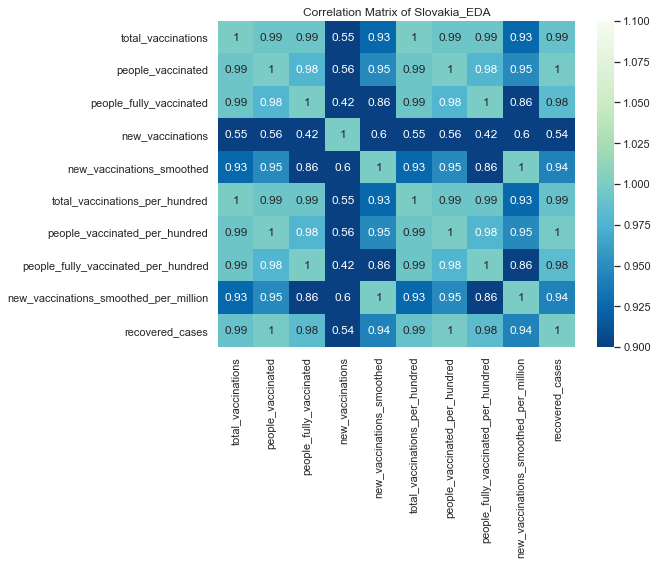

In [35]:
Slovakia_corr = Slovakia[['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations',
                           'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                           'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','recovered_cases']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(Slovakia_corr,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Slovakia_EDA")
Slovakia_corr

## These coulmns are filled with the mean values so as to remove the null value from the respective columns

In [36]:
Slovakia['total_vaccinations']=Slovakia['total_vaccinations'].fillna(Slovakia['total_vaccinations'].mean())
Slovakia['people_vaccinated']=Slovakia['people_vaccinated'].fillna(Slovakia['people_vaccinated'].mean())

Slovakia['people_fully_vaccinated']=Slovakia['people_fully_vaccinated'].fillna(Slovakia['people_fully_vaccinated'].mean())
Slovakia['new_vaccinations']=Slovakia['new_vaccinations'].fillna(Slovakia['new_vaccinations'].mean())

Slovakia['new_vaccinations_smoothed']=Slovakia['new_vaccinations_smoothed'].fillna(Slovakia['new_vaccinations_smoothed'].mean())
Slovakia['total_vaccinations_per_hundred']=Slovakia['total_vaccinations_per_hundred'].fillna(Slovakia['total_vaccinations_per_hundred'].mean())

Slovakia['people_vaccinated_per_hundred']=Slovakia['people_vaccinated_per_hundred'].fillna(Slovakia['people_vaccinated_per_hundred'].mean())
Slovakia['people_fully_vaccinated_per_hundred']=Slovakia['people_fully_vaccinated_per_hundred'].fillna(Slovakia['people_fully_vaccinated_per_hundred'].mean())

Slovakia['new_vaccinations']=Slovakia['new_vaccinations'].fillna(Slovakia['new_vaccinations'].mean())
Slovakia['new_vaccinations_smoothed_per_million']=Slovakia['new_vaccinations_smoothed_per_million'].fillna(Slovakia['new_vaccinations_smoothed_per_million'].mean())
Slovakia['recovered_cases']=Slovakia['recovered_cases'].fillna(Slovakia['recovered_cases'].mean())

## We use describe function to view the stastical details like percentile,mean etc of a dataframe.

In [37]:
Slovakia.describe().loc[:,['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','new_cases_smoothed_per_million',
                           'new_deaths_per_million','total_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
                          'hosp_patients','hosp_patients_per_million','new_tests_smoothed','new_tests_smoothed_per_thousand',
                           'positive_rate','tests_per_case']]

new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
count          369.000000    348.000000  348.000000           369.000000   
mean           897.614409   1290.652299   24.505747            22.323672   
std           1025.444700   2243.073107   38.447726            34.216058   
min              0.857000      1.000000    0.000000             0.000000   
25%             18.714000     28.000000    0.000000             0.000000   
50%            131.143000     39.500000    0.500000             0.714000   
75%           1956.429000   1393.500000   35.750000            26.571000   
max           3259.857000   8528.000000  204.000000           102.429000   

       new_cases_smoothed_per_million  new_deaths_per_million  \
count                      369.000000              348.000000   
mean                       164.408973                4.488514   
std                        187.822644                7.042172   
min                          0.157000                0.000000   
25%                          3.428000                0.000000   
50%                         24.020000                0.091500   
75%                        358.344000                6.548250   
max                        597.082000               37.365000   

       total_deaths_per_million  new_deaths_smoothed_per_million  \
count                348.000000                       369.000000   
mean                 236.398750                         4.088794   
std                  410.846089                         6.267119   
min                    0.183000                         0.000000   
25%                    5.129000                         0.000000   
50%                    7.234500                         0.131000   
75%                  255.236250                         4.867000   
max                 1562.007000                        18.761000   

       reproduction_rate  hosp_patients  hosp_patients_per_million  \
count         360.000000     312.000000                 312.000000   
mean            1.130389    1133.525641                 207.618971   
std             0.207956    1348.382694                 246.972696   
min             0.670000       0.000000                   0.000000   
25%             1.010000      15.000000                   2.747000   
50%             1.120000     213.500000                  39.105500   
75%             1.310000    2185.750000                 400.346750   
max             1.470000    3842.000000                 703.709000   

       new_tests_smoothed  new_tests_smoothed_per_thousand  positive_rate  \
count          366.000000                       366.000000     367.000000   
mean         51673.240437                         9.464601       0.045654   
std          97096.374709                        17.784387       0.044244   
min             82.000000                         0.015000       0.000000   
25%           1875.000000                         0.343750       0.014000   
50%           3944.000000                         0.722500       0.024000   
75%          45043.500000                         8.250500       0.080000   
max         323067.000000                        59.174000       0.178000   

       tests_per_case  
count      361.000000  
mean       125.626593  
std        251.065818  
min          5.600000  
25%         12.500000  
50%         41.700000  
75%         71.400000  
max       1000.000000

## The following correlation matrix contains the number of deaths that took place and the positive rate and the number of test per case

new_cases_smoothed  total_deaths  new_deaths  \
new_cases_smoothed                         1.000000      0.652427    0.745103   
total_deaths                               0.652427      1.000000    0.859386   
new_deaths                                 0.745103      0.859386    1.000000   
new_deaths_smoothed                        0.804309      0.940800    0.918967   
new_cases_smoothed_per_million             1.000000      0.652427    0.745103   
new_deaths_per_million                     0.745104      0.859387    1.000000   
total_deaths_per_million                   0.652427      1.000000    0.859386   
new_deaths_smoothed_per_million            0.804310      0.940800    0.918968   
reproduction_rate                         -0.198653     -0.270502   -0.281570   
hosp_patients                              0.880677      0.907800    0.888271   
hosp_patients_per_million                  0.880677      0.907800    0.888271   
new_tests_smoothed                         0.596054      0.962885    0.809576   
new_tests_smoothed_per_thousand            0.596054      0.962885    0.809576   
positive_rate                              0.568518     -0.071577    0.116951   
tests_per_case                            -0.354251     -0.195778   -0.239546   

                                 new_deaths_smoothed  \
new_cases_smoothed                          0.804309   
total_deaths                                0.940800   
new_deaths                                  0.918967   
new_deaths_smoothed                         1.000000   
new_cases_smoothed_per_million              0.804309   
new_deaths_per_million                      0.918968   
total_deaths_per_million                    0.940800   
new_deaths_smoothed_per_million             1.000000   
reproduction_rate                          -0.314211   
hosp_patients                               0.969721   
hosp_patients_per_million                   0.969721   
new_tests_smoothed                          0.888765   
new_tests_smoothed_per_thousand             0.888765   
positive_rate                               0.099789   
tests_per_case                             -0.232943   

                                 new_cases_smoothed_per_million  \
new_cases_smoothed                                     1.000000   
total_deaths                                           0.652427   
new_deaths                                             0.745103   
new_deaths_smoothed                                    0.804309   
new_cases_smoothed_per_million                         1.000000   
new_deaths_per_million                                 0.745104   
total_deaths_per_million                               0.652427   
new_deaths_smoothed_per_million                        0.804310   
reproduction_rate                                     -0.198653   
hosp_patients                                          0.880677   
hosp_patients_per_million                              0.880677   
new_tests_smoothed                                     0.596053   
new_tests_smoothed_per_thousand                        0.596053   
positive_rate                                          0.568519   
tests_per_case                                        -0.354251   

                                 new_deaths_per_million  \
new_cases_smoothed                             0.745104   
total_deaths                                   0.859387   
new_deaths                                     1.000000   
new_deaths_smoothed                            0.918968   
new_cases_smoothed_per_million                 0.745104   
new_deaths_per_million                         1.000000   
total_deaths_per_million                       0.859387   
new_deaths_smoothed_per_million                0.918969   
reproduction_rate                             -0.281570   
hosp_patients                                  0.888272   
hosp_patients_per_million                      0.888272   
new_tests_smoothed                             0.809578   

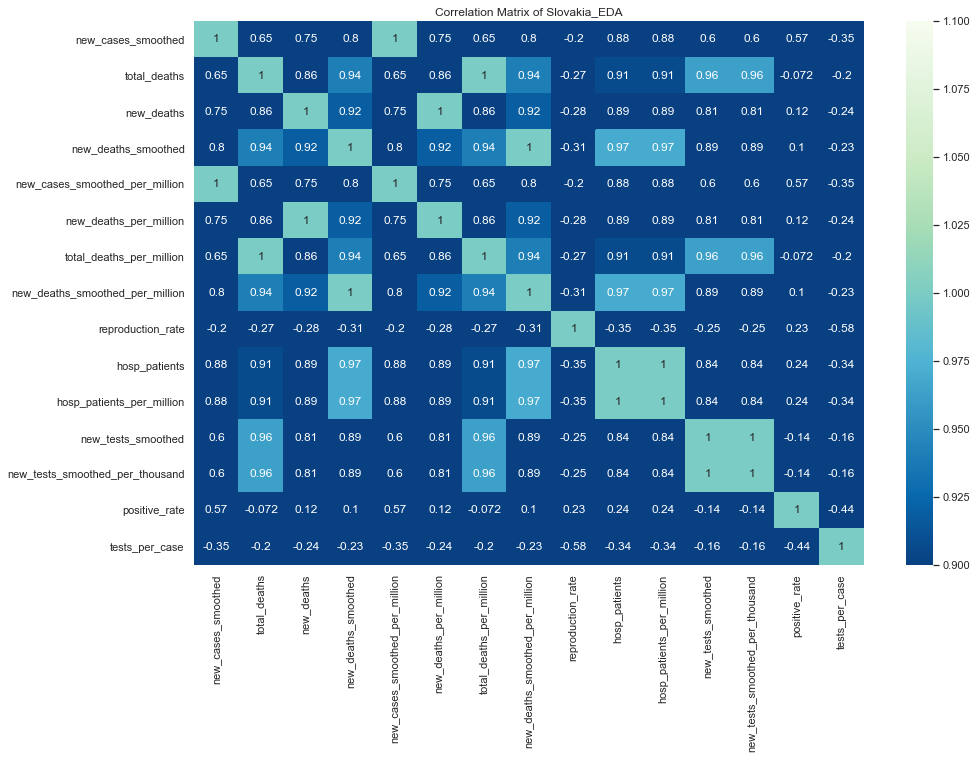

In [38]:
Slovakia_corr = Slovakia[['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','new_cases_smoothed_per_million',
                           'new_deaths_per_million','total_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
                          'hosp_patients','hosp_patients_per_million','new_tests_smoothed','new_tests_smoothed_per_thousand',
                           'positive_rate','tests_per_case']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(Slovakia_corr,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Slovakia_EDA")
Slovakia_corr

## These coulmns are filled with the mean values so as to remove the null value from the respective columns

In [39]:
Slovakia['new_cases_smoothed']=Slovakia['new_cases_smoothed'].fillna(Slovakia['new_cases_smoothed'].mean())
Slovakia['total_deaths']=Slovakia['total_deaths'].fillna(Slovakia['total_deaths'].mean())

Slovakia['new_deaths']=Slovakia['new_deaths'].fillna(Slovakia['new_deaths'].mean())
Slovakia['new_deaths_smoothed']=Slovakia['new_deaths_smoothed'].fillna(Slovakia['new_deaths_smoothed'].mean())

Slovakia['new_cases_smoothed_per_million']=Slovakia['new_cases_smoothed_per_million'].fillna(Slovakia['new_cases_smoothed_per_million'].mean())
Slovakia['new_deaths_per_million']=Slovakia['new_deaths_per_million'].fillna(Slovakia['new_deaths_per_million'].mean())

Slovakia['total_deaths_per_million']=Slovakia['total_deaths_per_million'].fillna(Slovakia['total_deaths_per_million'].mean())
Slovakia['new_deaths_smoothed_per_million']=Slovakia['new_deaths_smoothed_per_million'].fillna(Slovakia['new_deaths_smoothed_per_million'].mean())

Slovakia['reproduction_rate']=Slovakia['reproduction_rate'].fillna(Slovakia['reproduction_rate'].mean())
Slovakia['hosp_patients']=Slovakia['hosp_patients'].fillna(Slovakia['hosp_patients'].mean())

Slovakia['hosp_patients_per_million']=Slovakia['hosp_patients_per_million'].fillna(Slovakia['hosp_patients_per_million'].mean())
Slovakia['new_tests_smoothed']=Slovakia['new_tests_smoothed'].fillna(Slovakia['new_tests_smoothed'].mean())

Slovakia['new_tests_smoothed_per_thousand']=Slovakia['new_tests_smoothed_per_thousand'].fillna(Slovakia['new_tests_smoothed_per_thousand'].mean())
Slovakia['positive_rate']=Slovakia['positive_rate'].fillna(Slovakia['positive_rate'].median())
Slovakia['tests_per_case']=Slovakia['tests_per_case'].fillna(Slovakia['tests_per_case'].mean())

Slovakia['stringency_index']=Slovakia['stringency_index'].fillna(Slovakia['stringency_index'].mean())
Slovakia['new_tests']=Slovakia['new_tests'].fillna(Slovakia['new_tests'].mean())

In [40]:
Slovakia['total_tests']=Slovakia['total_tests'].fillna(Slovakia['total_tests'].mean())
Slovakia['total_tests_per_thousand']=Slovakia['total_tests_per_thousand'].fillna(Slovakia['total_tests_per_thousand'].mean())
Slovakia['new_tests_per_thousand']=Slovakia['new_tests_per_thousand'].fillna(Slovakia['new_tests_per_thousand'].mean())
#Slovakia['tests_units']=Slovakia['tests_units'].fillna(Slovakia['tests_units'].mean())

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

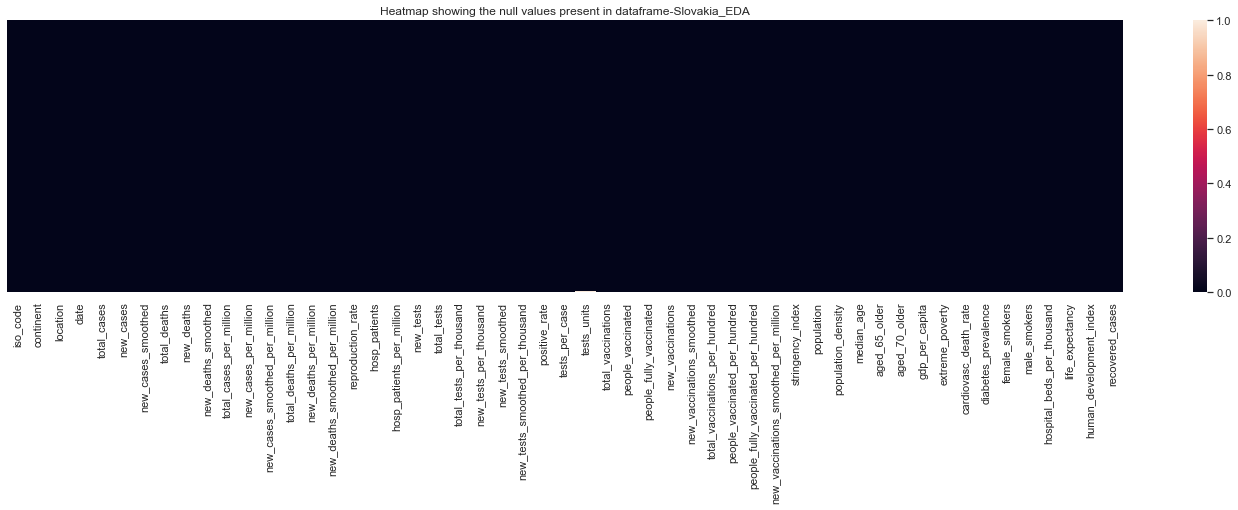

In [41]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

## The function info() tells us that the number of null values and number of non-null values present in the dataframe

In [42]:
Slovakia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               374 non-null    object 
 1   continent                              374 non-null    object 
 2   location                               374 non-null    object 
 3   date                                   374 non-null    object 
 4   total_cases                            374 non-null    float64
 5   new_cases                              374 non-null    float64
 6   new_cases_smoothed                     374 non-null    float64
 7   total_deaths                           374 non-null    float64
 8   new_deaths                             374 non-null    float64
 9   new_deaths_smoothed                    374 non-null    float64
 10  total_cases_per_million                374 non-null    float64
 11  new_ca

## As we can observe in the above table, that the date in the given dataframe is of the type object. So converting it into data_time object

In [43]:
Slovakia['date'] = pd.to_datetime(Slovakia['date'],format='%d-%m-%Y') 

In [44]:
print("Starting date =",Slovakia['date'].min())
print("End date =",Slovakia['date'].max())
print("Length of data with respect to days :",Slovakia['date'].max()-Slovakia['date'].min())

Starting date = 2020-03-06 00:00:00
End date = 2021-03-14 00:00:00
Length of data with respect to days : 373 days 00:00:00


## So we have the Slovakia _country data for 373 days that is from 6th march 2020 (2020-03-06) to 14th March 2020 (2020-03-14) 

## Now we can obsverve the given data interms of line_plot which shows the clear representation of that particular feature with respect to that particular date

## 1. plot showing the number of total cases with respect to date

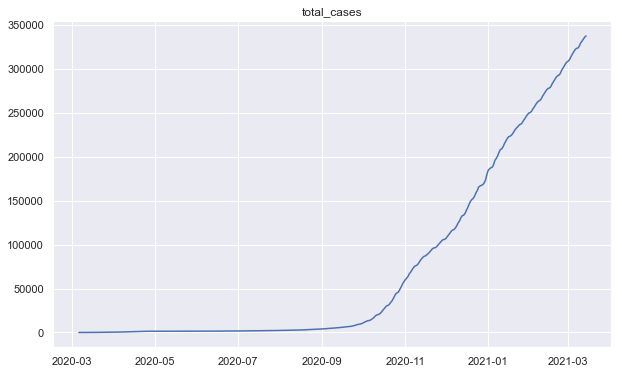

In [45]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_cases'])
plt.title('total_cases')
plt.tick_params(axis='x', rotation=0)

## 2. plot showing the number of new cases with respect to date

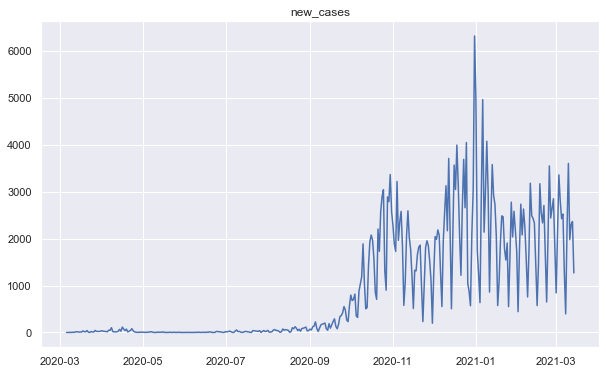

In [44]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_cases'])
plt.title('new_cases')
plt.tick_params(axis='x', rotation=0)

## 3. plot showing the number of new_cases_smoothed with respect to date

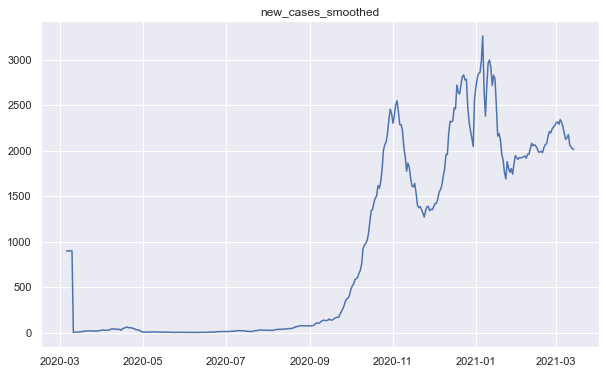

In [45]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_cases_smoothed'])
plt.title('new_cases_smoothed')
plt.tick_params(axis='x', rotation=0)

## 4. plot showing the number of total_deaths with respect to date

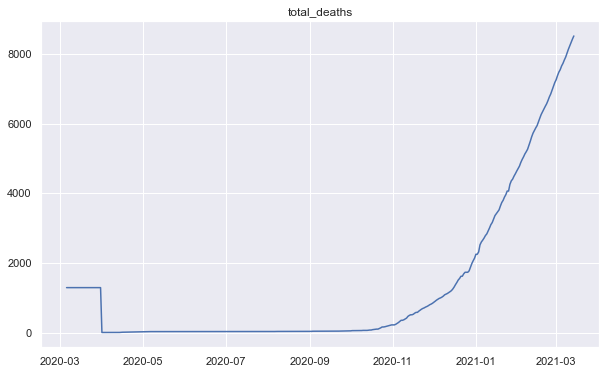

In [46]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_deaths'])
plt.title('total_deaths')
plt.tick_params(axis='x', rotation=0)

## 5. plot showing the number of new_deaths with respect to date

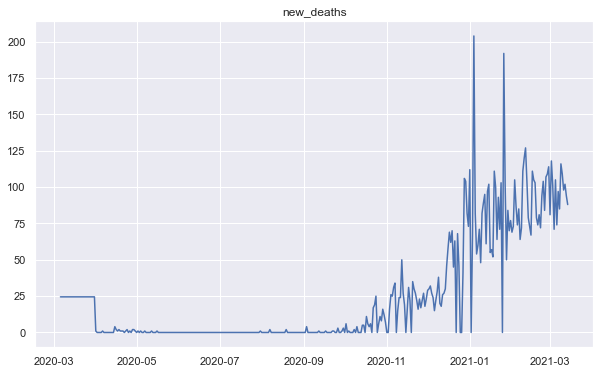

In [47]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths'])
plt.title('new_deaths')
plt.tick_params(axis='x', rotation=0)


## 6. plot showing the number of new_deaths_smoothed with respect to date

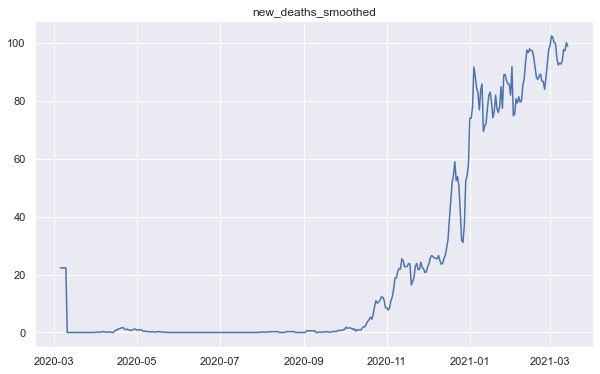

In [48]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_smoothed'])
plt.title('new_deaths_smoothed')
plt.tick_params(axis='x', rotation=0)

## 7. plot showing the number of total_deaths_per_million with respect to date

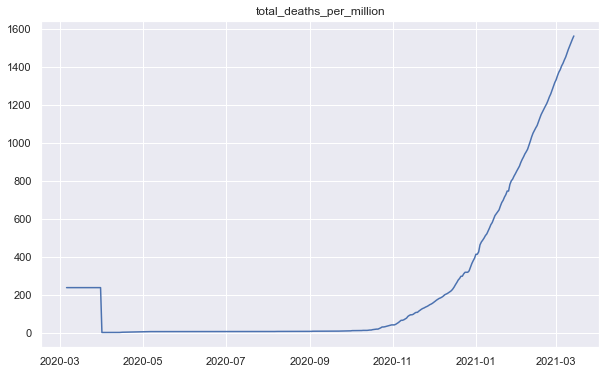

In [49]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_deaths_per_million'])
plt.title('total_deaths_per_million')
plt.tick_params(axis='x', rotation=0)

## 8. plot showing the number of new_deaths_per_million with respect to date

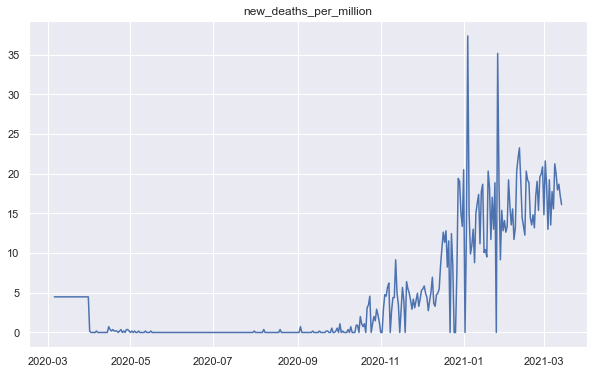

In [50]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_per_million'])
plt.title('new_deaths_per_million')
plt.tick_params(axis='x', rotation=0)

## 9. plot showing the number of new_deaths_smoothed_per_million with respect to date

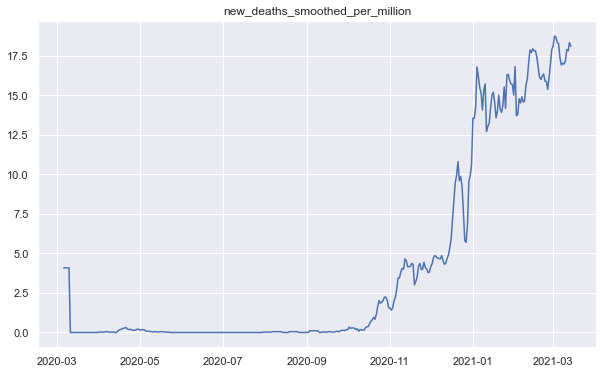

In [51]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_smoothed_per_million'])
plt.title('new_deaths_smoothed_per_million')
plt.tick_params(axis='x', rotation=0)

## 10. plot showing the number of new_tests with respect to date

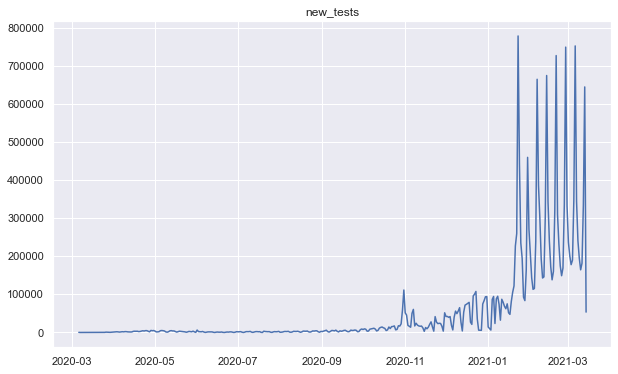

In [52]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_tests'])
plt.title('new_tests')
plt.tick_params(axis='x', rotation=0)

## 11. plot showing the number of total_tests with respect to date

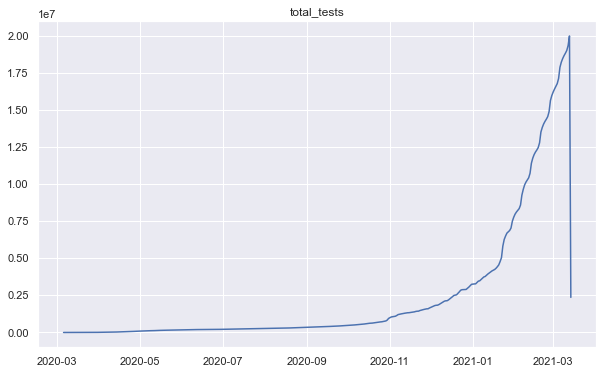

In [53]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_tests'])
plt.title('total_tests')
plt.tick_params(axis='x', rotation=0)

## 12. plot showing the number of positive_rate with respect to date

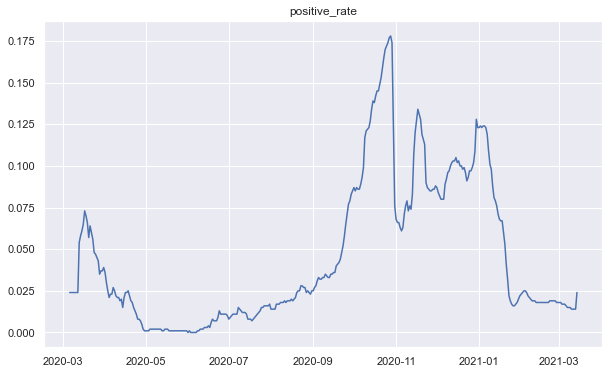

In [54]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['positive_rate'])
plt.title('positive_rate')
plt.tick_params(axis='x', rotation=0)

## 13. plot showing the number of stringency_index with respect to date

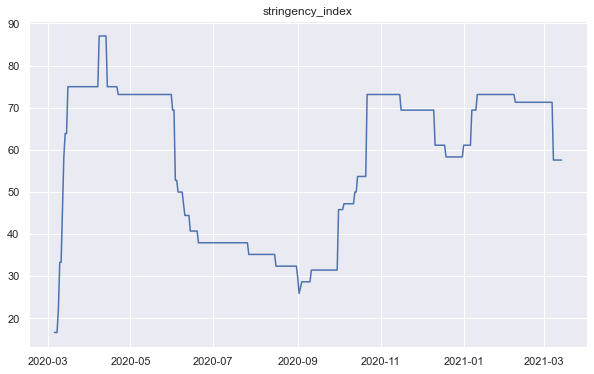

In [55]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['stringency_index'])
plt.title('stringency_index')
plt.tick_params(axis='x', rotation=0)

## 14. plot showing the number of recovered_cases with respect to date

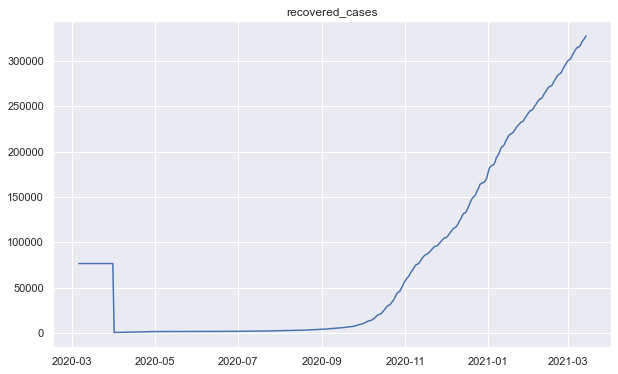

In [56]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['recovered_cases'])
plt.title('recovered_cases')
plt.tick_params(axis='x', rotation=0)

## Scatter plots 

<ipython-input-48-47542f246aaf>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<Figure size 432x216 with 0 Axes>

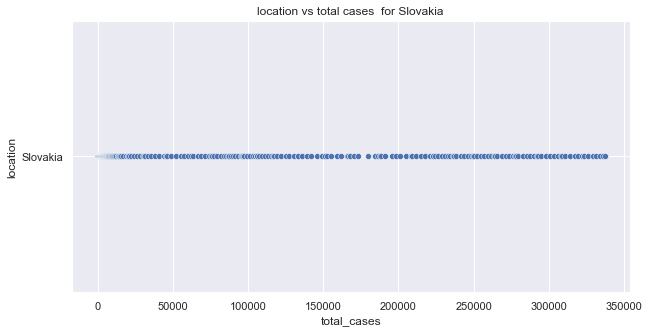

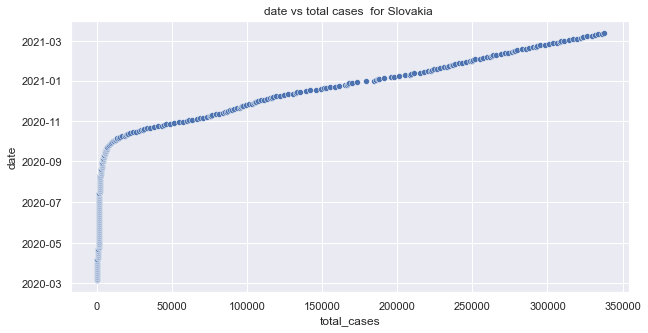

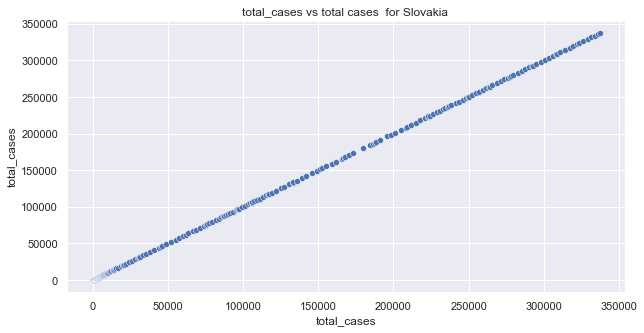

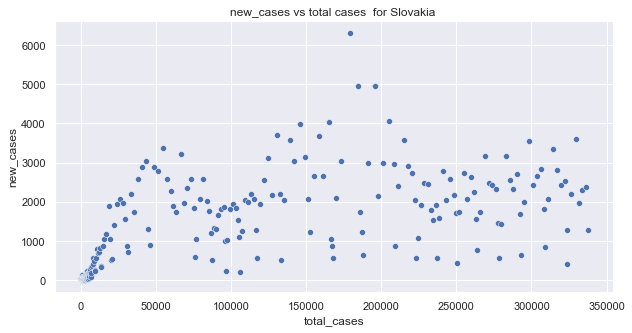

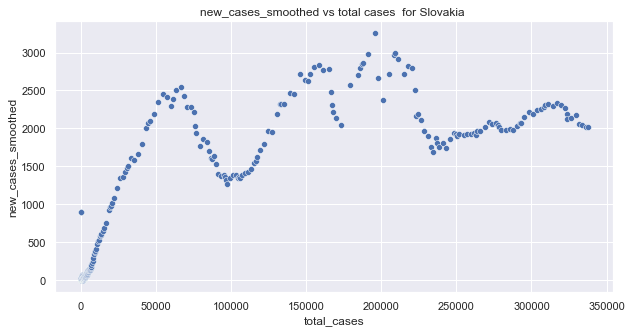

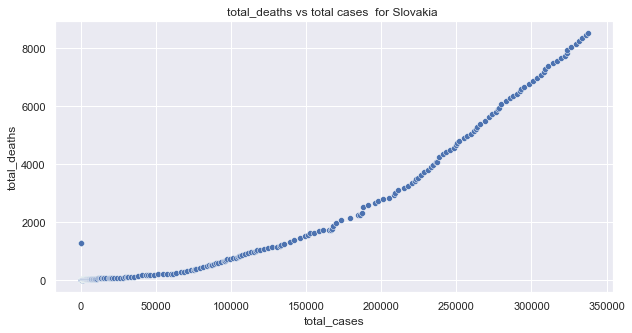

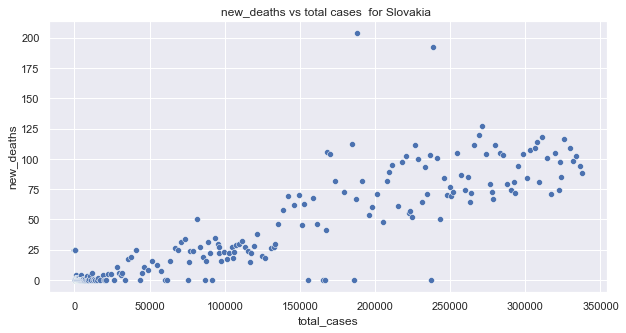

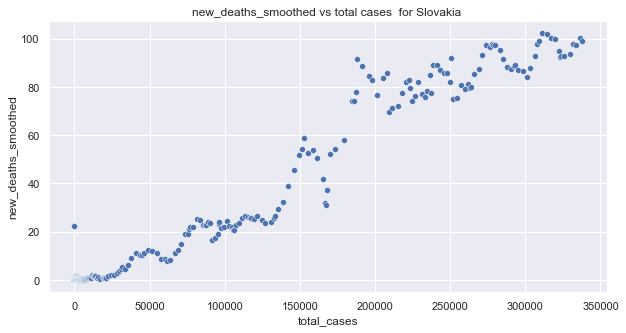

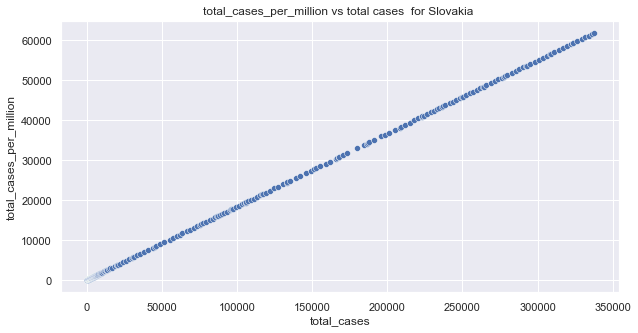

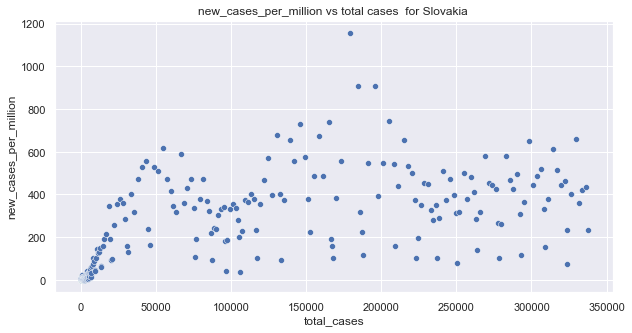

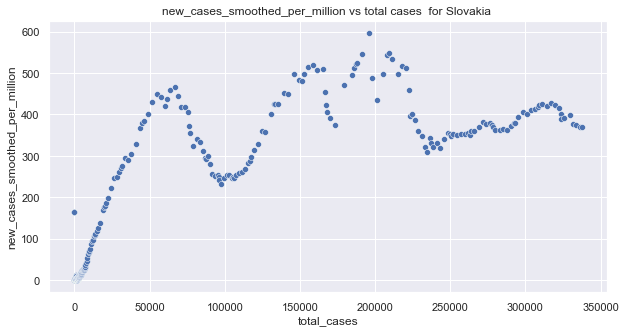

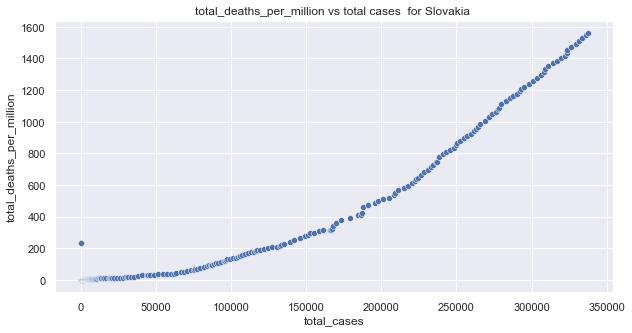

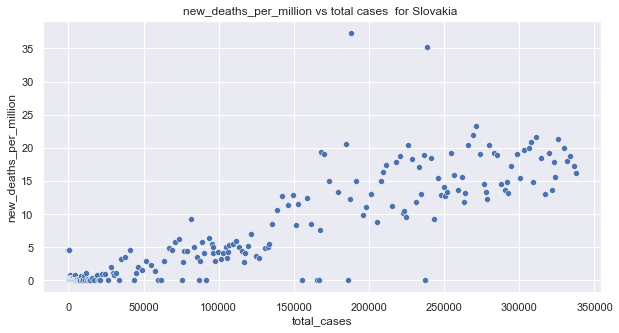

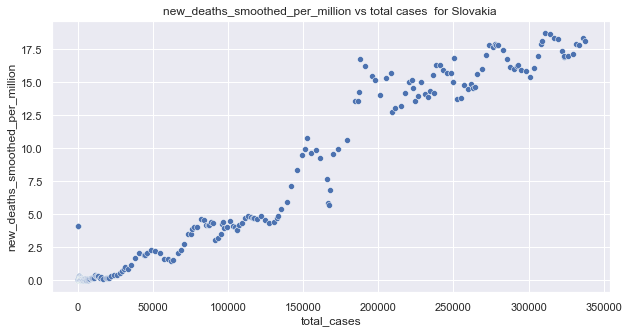

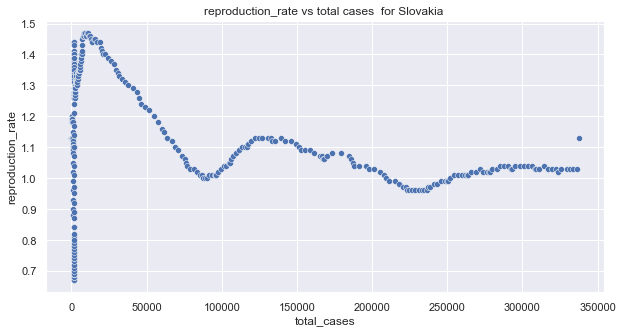

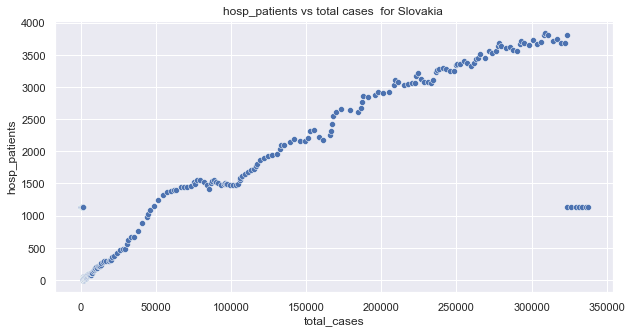

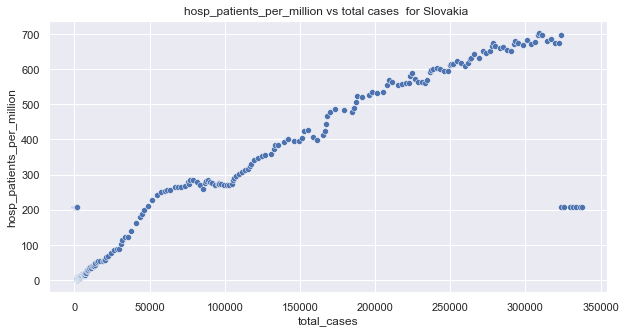

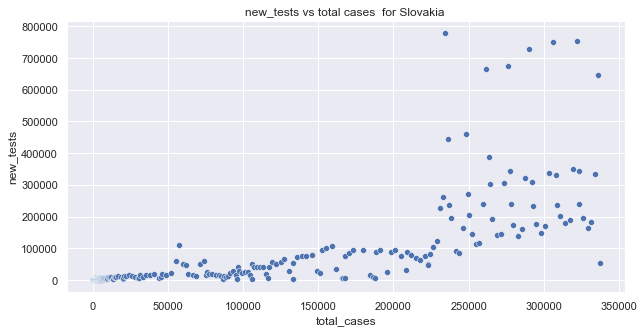

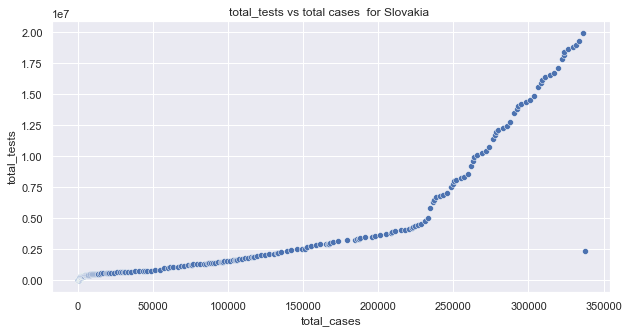

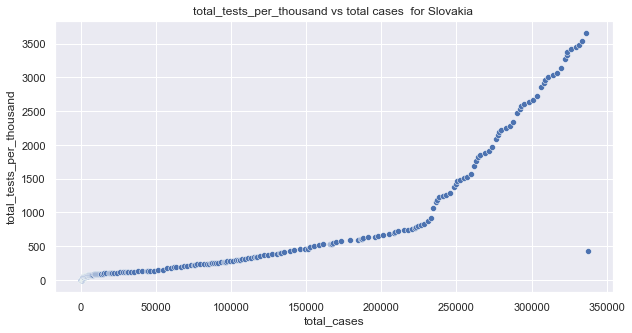

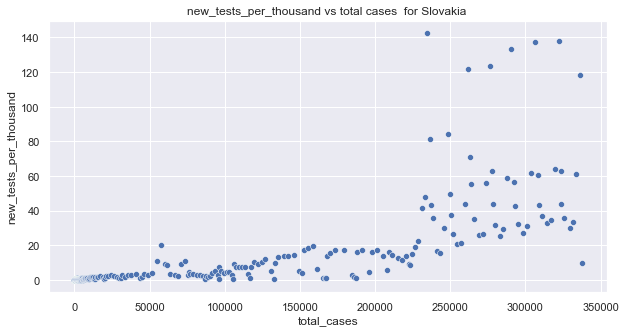

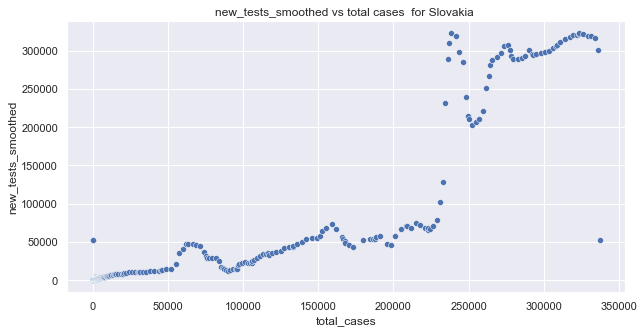

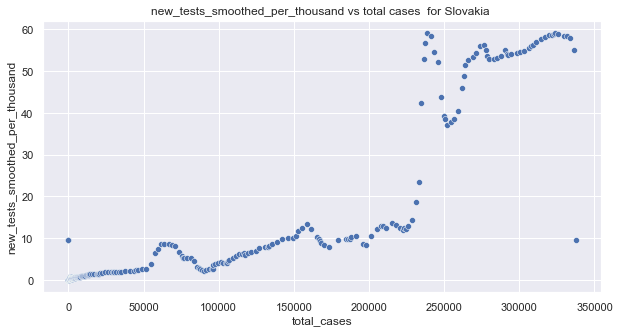

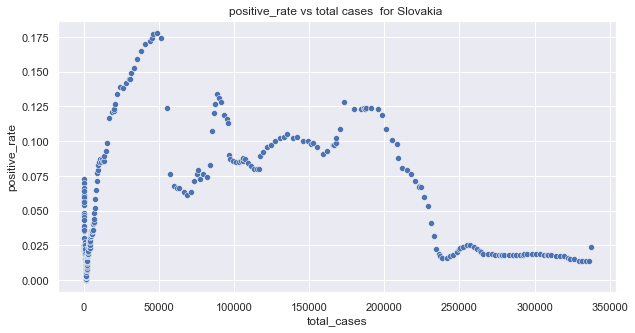

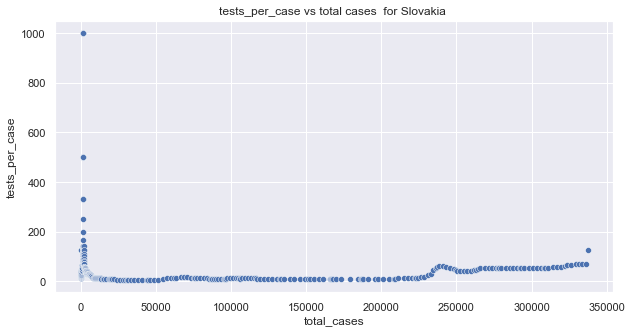

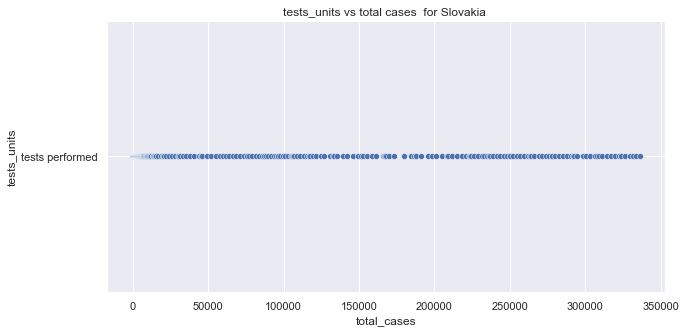

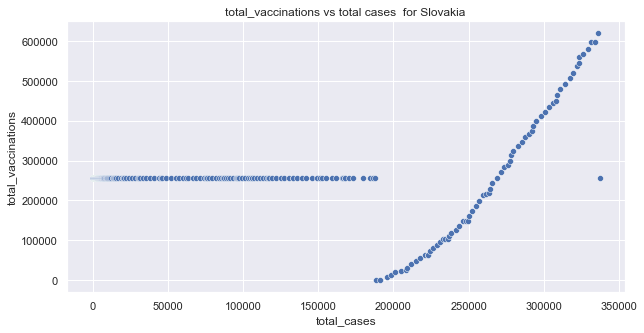

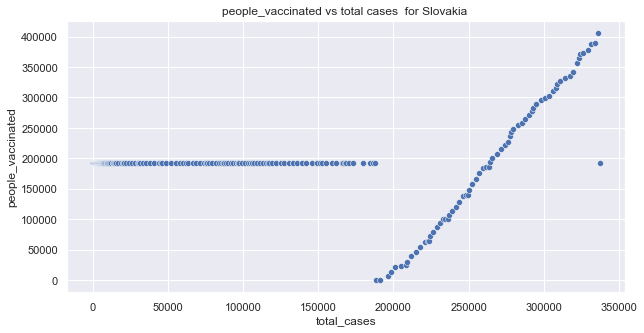

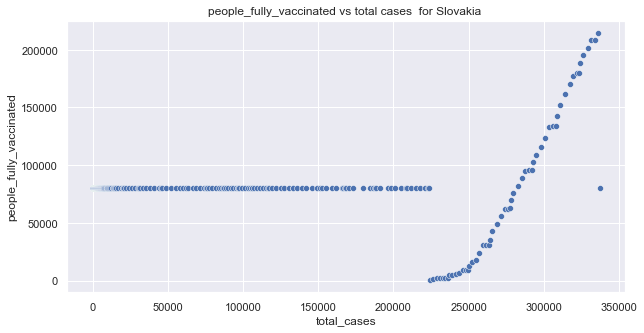

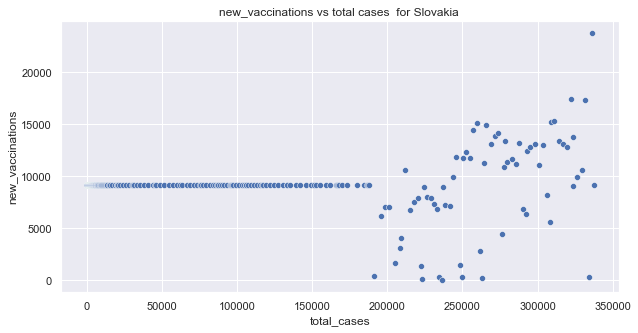

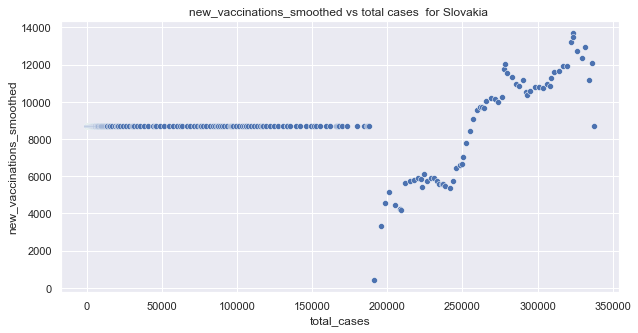

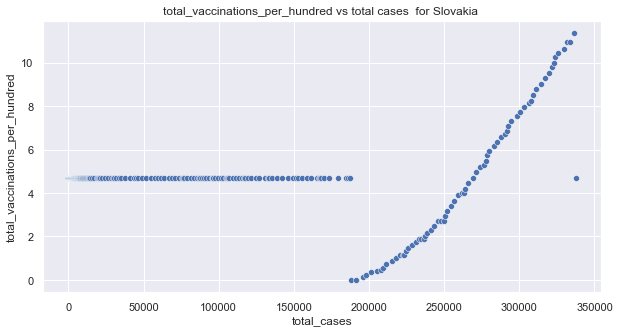

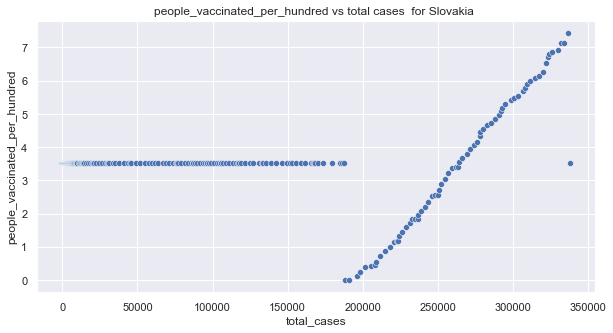

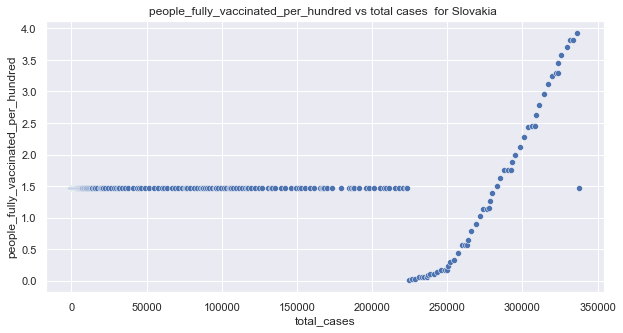

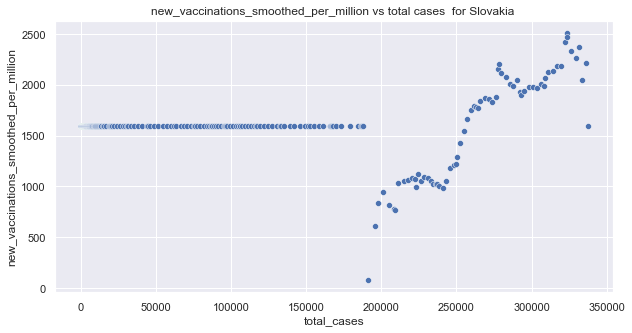

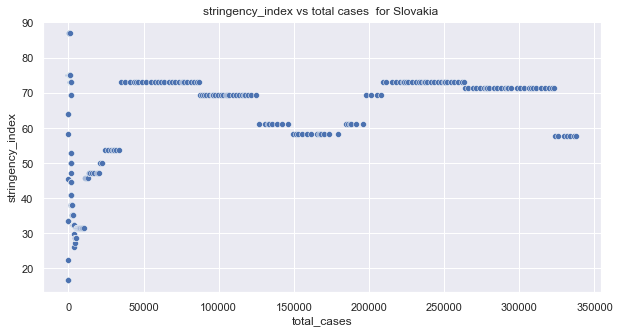

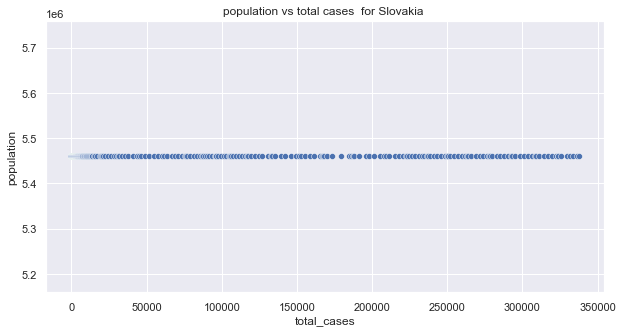

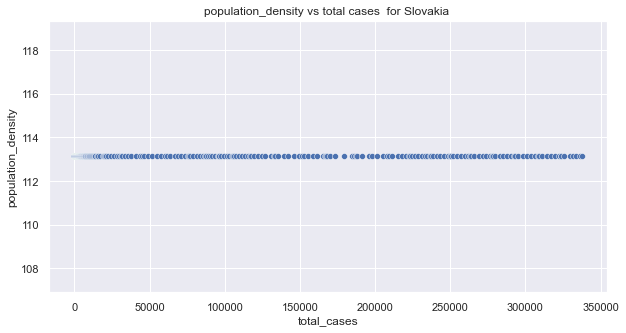

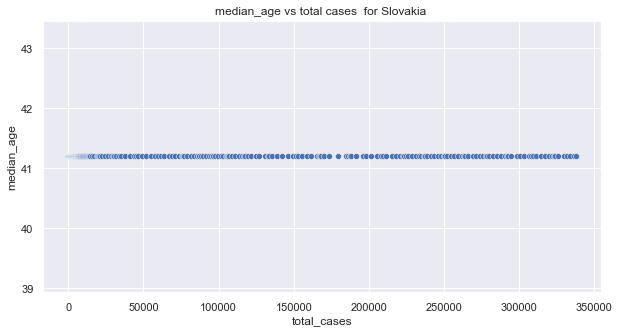

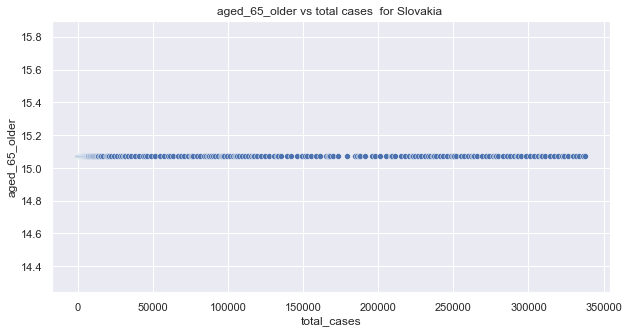

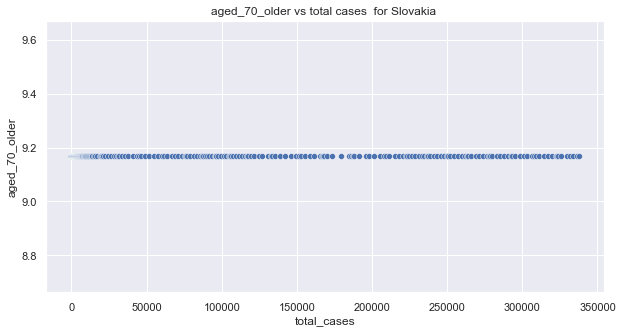

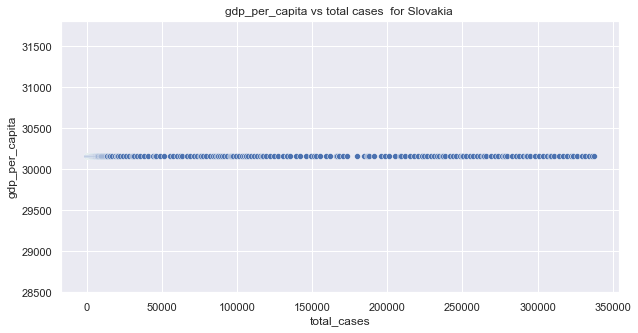

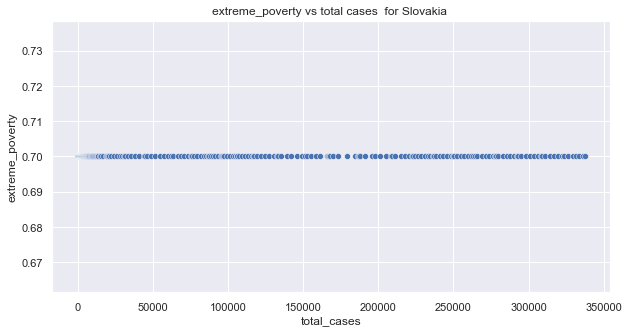

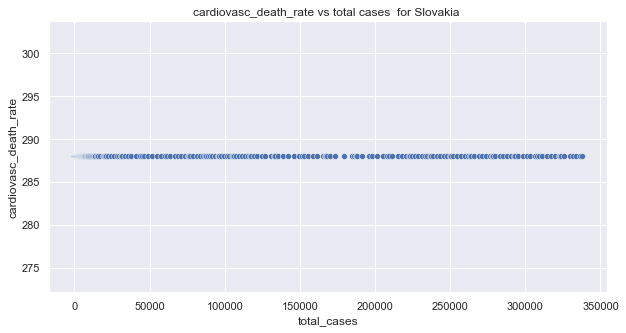

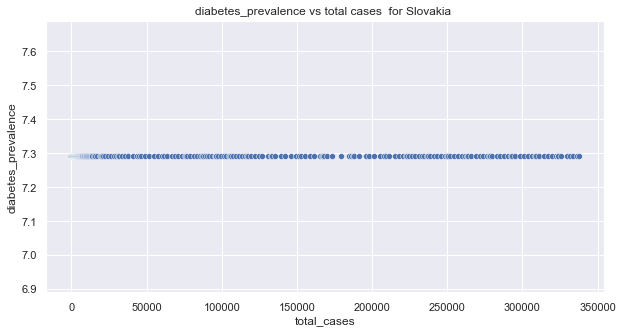

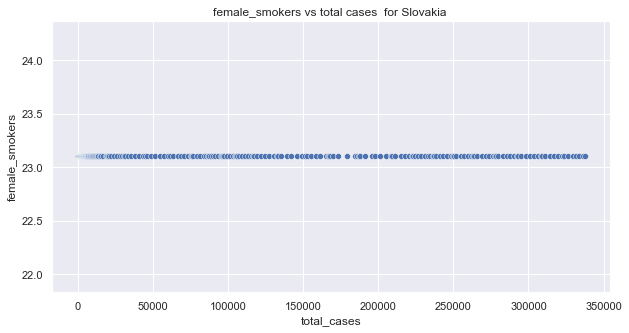

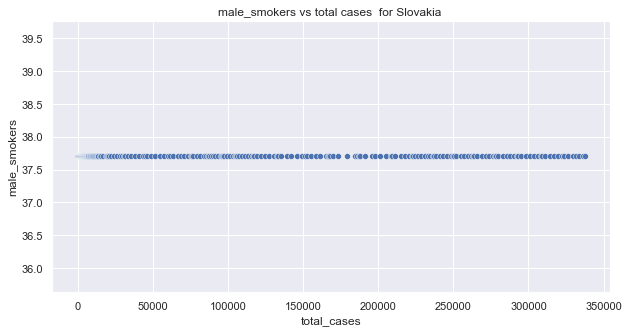

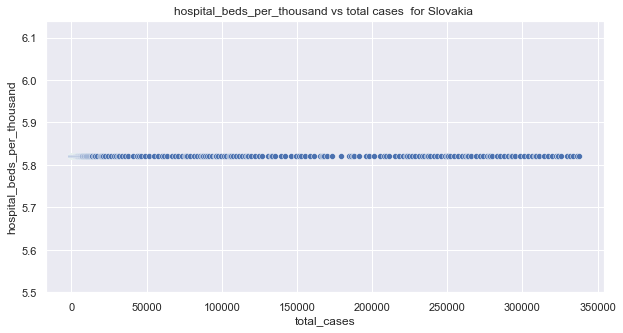

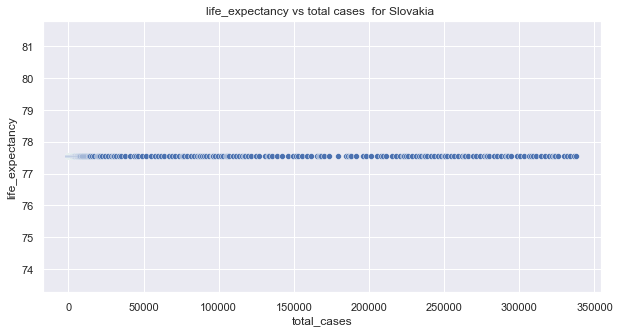

In [48]:
for i, feature in enumerate(Slovakia.columns[2:len(Slovakia.columns)-2]):
    
    plt.figure(i)
    plt.figure(figsize=(10,5))
    g = sns.scatterplot(x=Slovakia.total_cases,y=feature,data=Slovakia).set_title(feature +" vs total cases  for Slovakia ")

# Adding a new feature 'month' to findout the requirements with respect to each month

In [57]:
Slovakia['month'] = Slovakia['date'].dt.month_name()

In [58]:
Slovakia.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_dens

In [59]:
Slovakia_new = Slovakia.loc[:,'date':'stringency_index']


## Now, we group the gven data in months, so that we can find out the features with respect to each month

In [60]:
Slovakiaa = Slovakia.groupby(Slovakia.month).sum()
Slovakiaa = Slovakiaa.reindex(['April','May','June','July','August','September','October','November','December',
             'January', 'February','March'])
Slovakiaa = Slovakiaa.loc[:,['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','total_cases_per_million',
                             'new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million',
                             'new_deaths_smoothed_per_million','total_tests','positive_rate','tests_per_case','total_vaccinations',
                             'people_vaccinated','stringency_index']]


## The following table tells the variation of each feature with repect to the month

In [61]:
Slovakiaa

total_cases  new_cases  new_cases_smoothed  total_deaths  \
month                                                                 
April          28263.0     1033.0         1092.571000     260.00000   
May            45753.0      125.0          136.715000     832.00000   
June           47133.0      146.0          130.286000     840.00000   
July           60846.0      625.0          567.713000     869.00000   
August         92437.0     1625.0         1495.713000     975.00000   
September     187265.0     6224.0         5205.143000    1172.00000   
October       891676.0    47523.0        40866.714000    3123.00000   
November     2567554.0    48265.0        52710.573000   15661.00000   
December     4363337.0    73614.0        67625.144000   42931.00000   
January      6785954.0    70370.0        73392.001000  106072.00000   
February     7798032.0    58170.0        57127.287000  165803.00000   
March        4538514.0    29783.0        35357.929046  144165.95977   

            new_deaths  new_deaths_smoothed  total_cases_per_million  \
month                                                                  
April        23.000000             19.28700                 5176.713   
May           5.000000              8.71800                 8380.218   
June          0.000000              0.00000                 8632.983   
July          1.000000              0.14300                11144.684   
August        4.000000              4.86200                16930.960   
September    15.000000             10.85600                34299.861   
October     171.000000            144.00100               163321.304   
November    620.000000            585.57000               470278.735   
December   1299.000000           1126.85500               799198.226   
January    2504.000000           2500.00000              1242929.986   
February   2547.000000           2472.85700              1428304.377   
March      1976.149425           1475.90436               831284.023   

           new_cases_per_million  new_cases_smoothed_per_million  \
month                                                              
April                    189.204                      200.119000   
May                       22.893                       25.039000   
June                      26.737                       23.862000   
July                     114.475                      103.984000   
August                   297.640                      273.958000   
September               1140.003                      953.387000   
October                 8704.414                     7485.237000   
November                8840.324                     9654.581000   
December               13483.300                    12386.367000   
January                12889.123                    13442.635000   
February               10654.543                    10463.555000   
March                   5455.120                     6476.231864   

           total_deaths_per_million  new_deaths_per_million  \
month                                                         
April                       47.6180                4.210000   
May                        152.3960                0.915000   
June                       153.8700                0.000000   
July                       159.1820                0.183000   
August                     178.5800                0.732000   
September                  214.6630                2.746000   
October                    572.0190               31.322000   
November                  2868.5010              113.563000   
December                  7863.3370              237.925000   
January                  19428.3780              458.637000   
February                 30368.8380              466.515000   
March                    26405.7505              361.956374   

           new_deaths_smoothed_per_million   total_tests  positive_rate  \
month                                                                     
April                

### So the above table shows that all features in the given data are grouped according to respective months. We can see that the total cases for each month is increasing rapidly, and even the number of new cases and number of deaths that are taking place each month is increasing

In [62]:
Slovakia.index

RangeIndex(start=0, stop=374, step=1)

## The following plots gives us the clear picture of each feature of the dataframe with respect to that particular month for country Slovakia (2020-2021)

### 1. line_plot showing the number of total cases for each month

<ipython-input-63-57ceeefa1a8d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_cases vs month  for Slovakia')

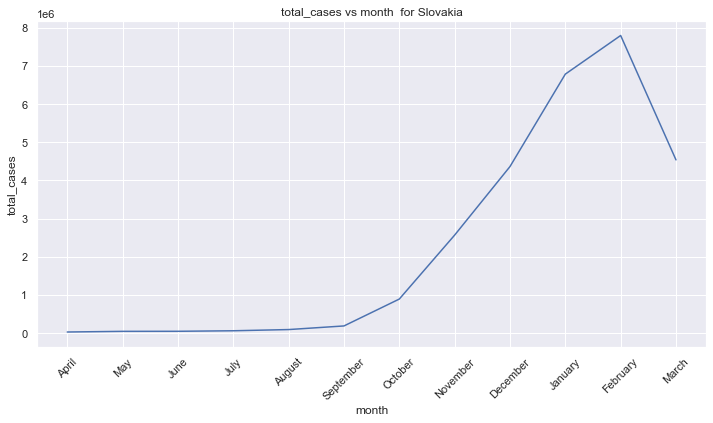

In [63]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases vs month  for Slovakia")

## 2. line_plot showing the number of new cases for each month

<ipython-input-64-38653286b1a4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases vs month for Slovakia')

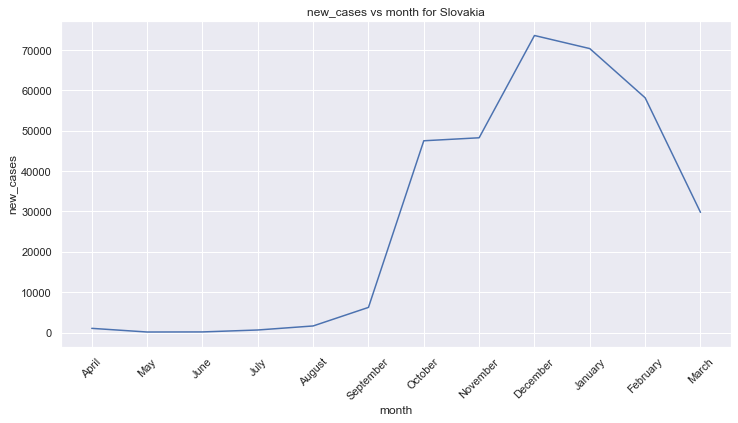

In [64]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases vs month for Slovakia")

## 3. line_plot showing the number of new_cases_smoothed for each month

<ipython-input-65-b24faa45ac9f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases_smoothed vs month  for Slovakia')

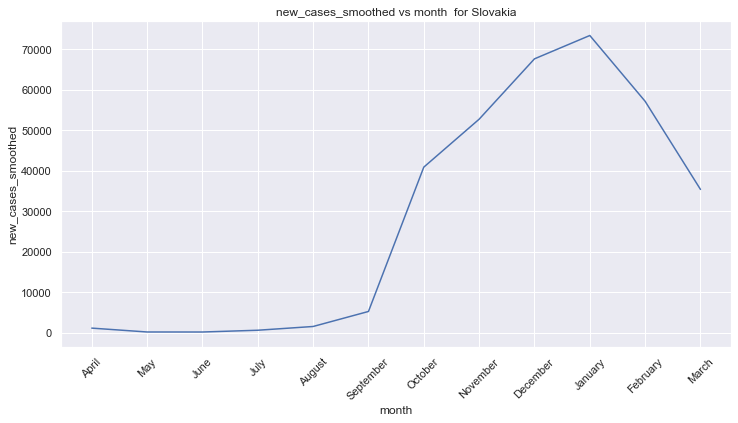

In [65]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_smoothed,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_smoothed vs month  for Slovakia")

## 4. line_plot showing the number of total_deaths for each month

<ipython-input-66-3aef93160d47>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_deaths vs month  for Slovakia')

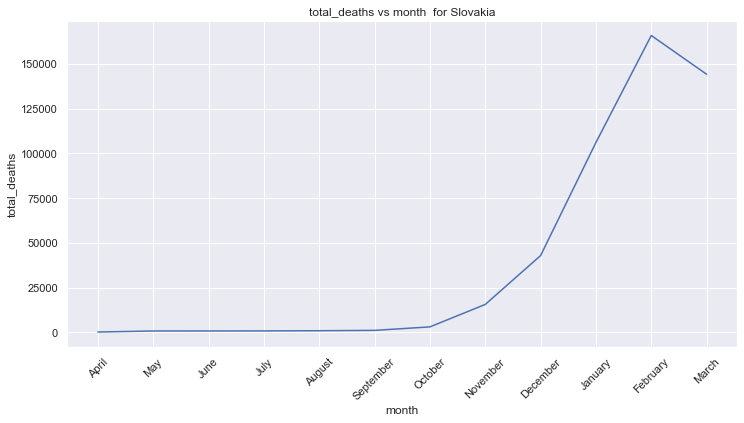

In [66]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths vs month  for Slovakia")

## 5. line_plot showing the number of new_deaths for each month

<ipython-input-67-b48c367d80c5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_deaths vs month  for Slovakia')

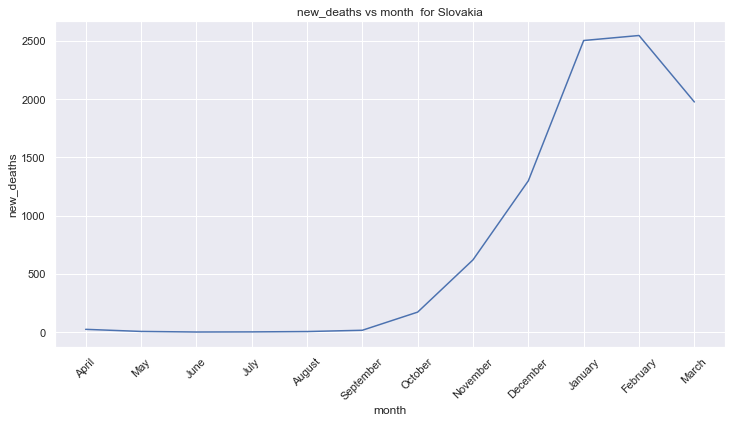

In [67]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths vs month  for Slovakia")

## 6. line_plot showing the number of new_deaths_smoothed for each month

<ipython-input-68-13a056e902ef>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_deaths_smoothed vs month  for Slovakia')

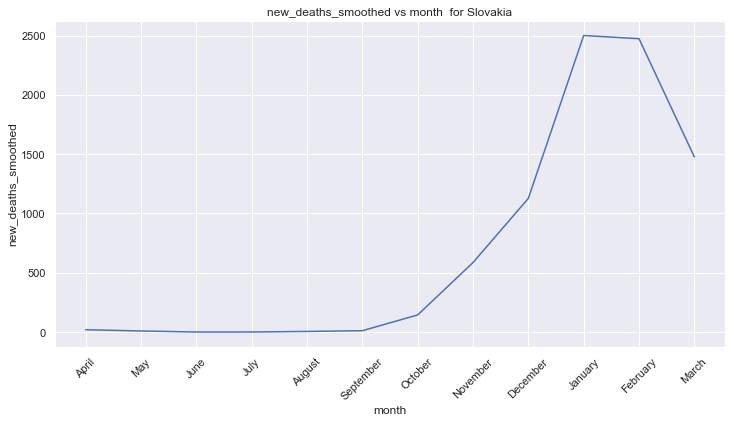

In [68]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths_smoothed,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths_smoothed vs month  for Slovakia")

## 7. line_plot showing the number of total_cases_per_million for each month

<ipython-input-69-742788c5f9e2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_cases_per_million vs month  for Slovakia')

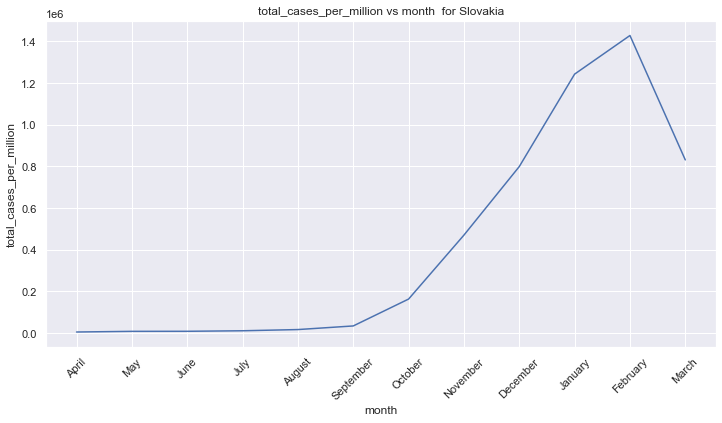

In [69]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases_per_million vs month  for Slovakia")

## 8. line_plot showing the number of new_cases_per_million for each month

<ipython-input-70-2a204afccfe4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases_per_million vs month  for Slovakia')

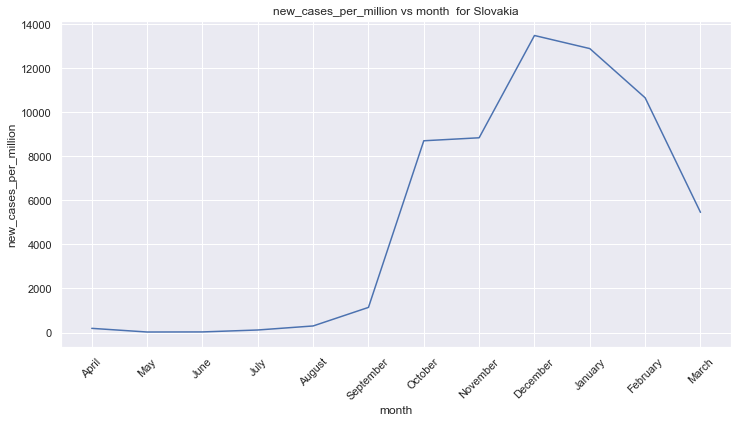

In [70]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_per_million vs month  for Slovakia")

## 9. line_plot showing the number of total_deaths_per_million for each month

<ipython-input-71-25343b46ba29>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_deaths_per_million vs month  for Slovakia')

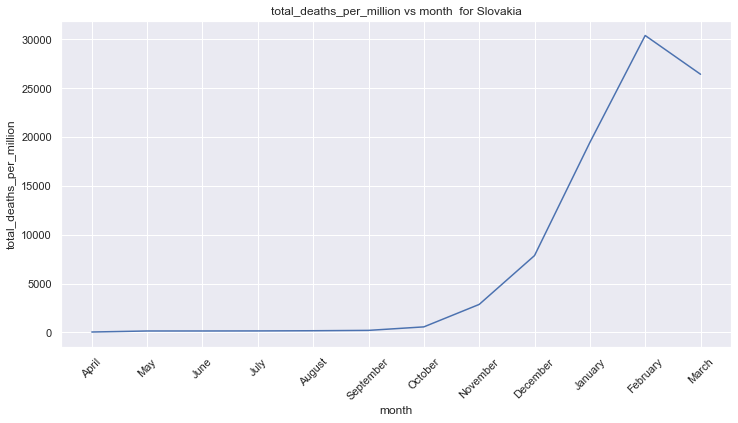

In [71]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths_per_million vs month  for Slovakia")

## 10. line_plot showing the number of total_tests for each month

<ipython-input-72-58a105286064>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_tests vs month  for Slovakia')

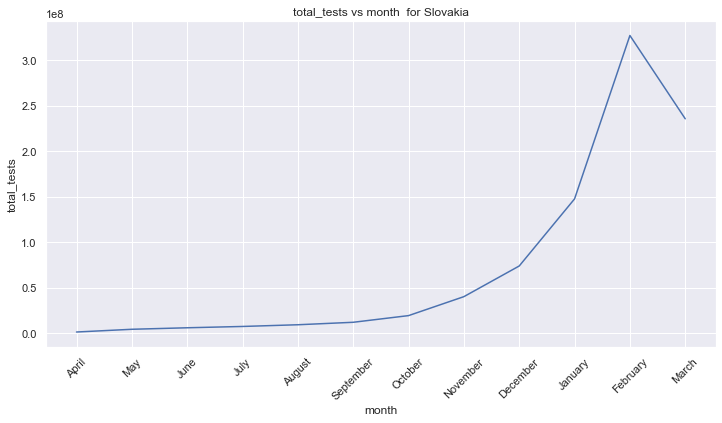

In [72]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_tests,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_tests vs month  for Slovakia")

## 11. line_plot showing the number of positive_rate for each month

<ipython-input-73-840c245ce336>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'positive_rate vs month  for Slovakia')

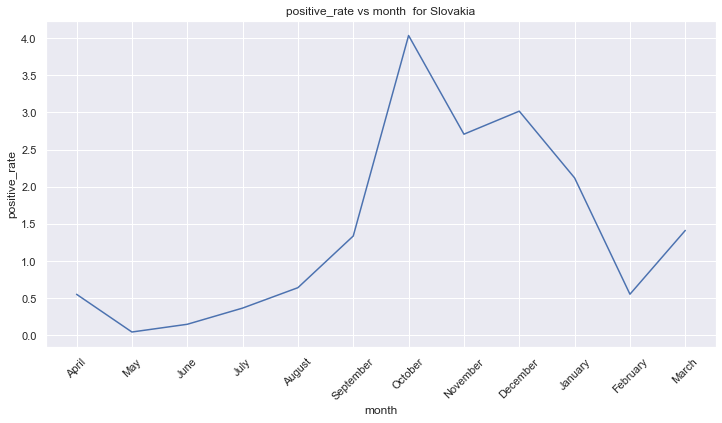

In [73]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.positive_rate,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("positive_rate vs month  for Slovakia")

## 12. line_plot showing the number of stringency_index for each month

<ipython-input-74-1c095d881eef>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'stringency_index vs month  for Slovakia')

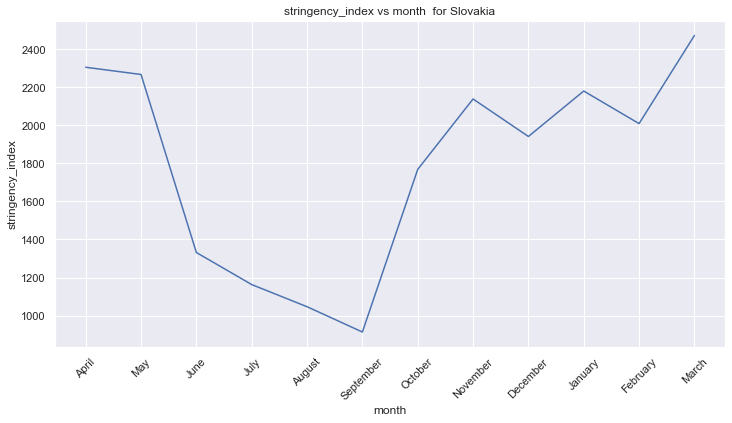

In [74]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.stringency_index,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("stringency_index vs month  for Slovakia")

In [75]:
## 13. plot showing the number of recovered_cases with respect to each month

plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.recovered_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("recovered_cases vs month  for Slovakia")

## The above lineplots shows the variation of cases for each month.  We can also plot the same using bar_plot for better understanding for country Slovakia (2020-2021)

## 1. bar_plot showing the number of total_cases for each month

Text(0.5, 1.0, 'total_cases vs month  for Slovakia')

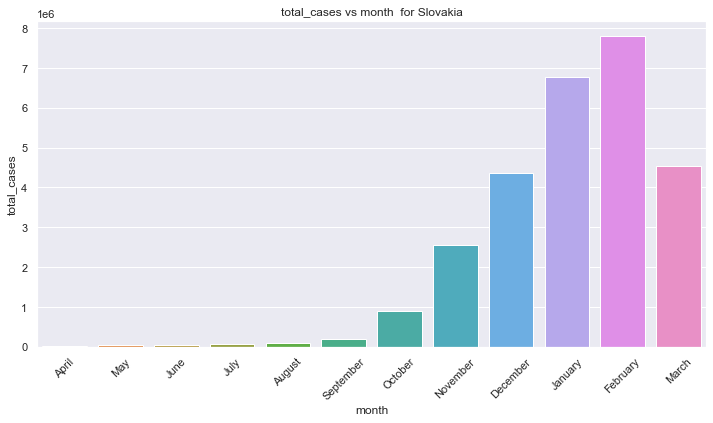

In [76]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases vs month  for Slovakia")

## 2. bar_plot showing the number of new_cases for each month

Text(0.5, 1.0, 'new_cases vs month  for Slovakia')

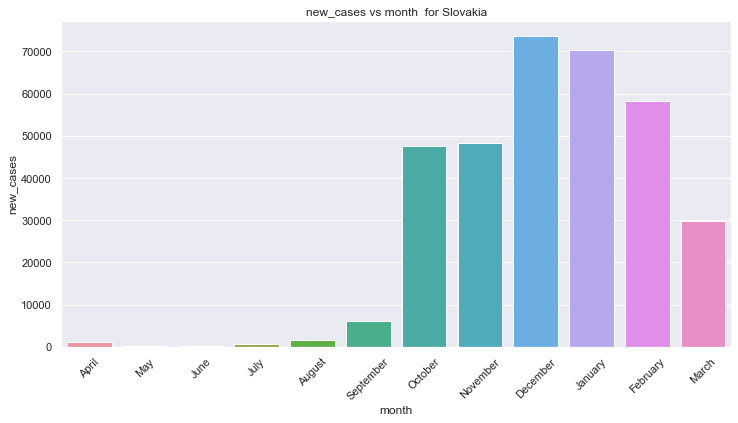

In [77]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases vs month  for Slovakia")

## 3. bar_plot showing the number of total_deaths for each month

Text(0.5, 1.0, 'total_deaths vs month  for Slovakia')

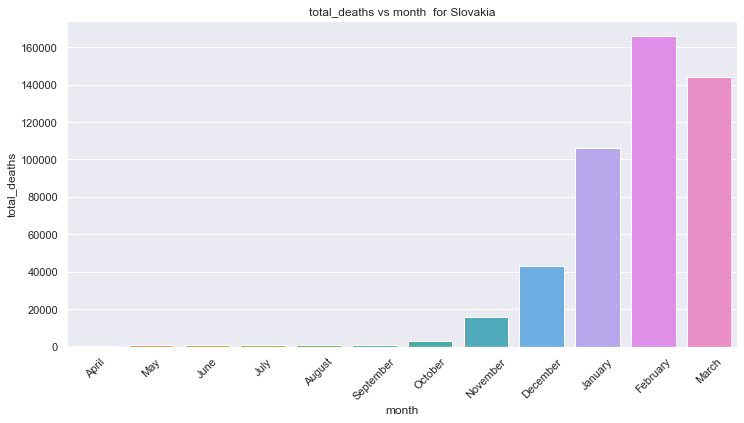

In [78]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths vs month  for Slovakia")

## 4. bar_plot showing the number of new_deaths for each month

Text(0.5, 1.0, 'new_deaths vs month  for Slovakia')

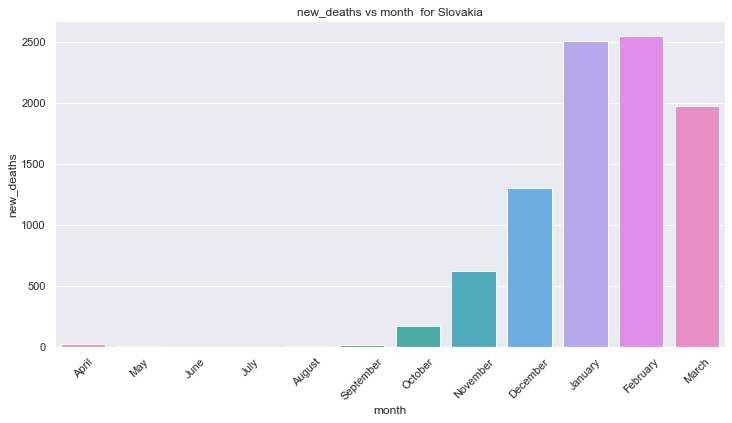

In [79]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths vs month  for Slovakia")

## 5. bar_plot showing the number of total_cases_per_million for each month

Text(0.5, 1.0, 'total_cases_per_million vs month  for Slovakia')

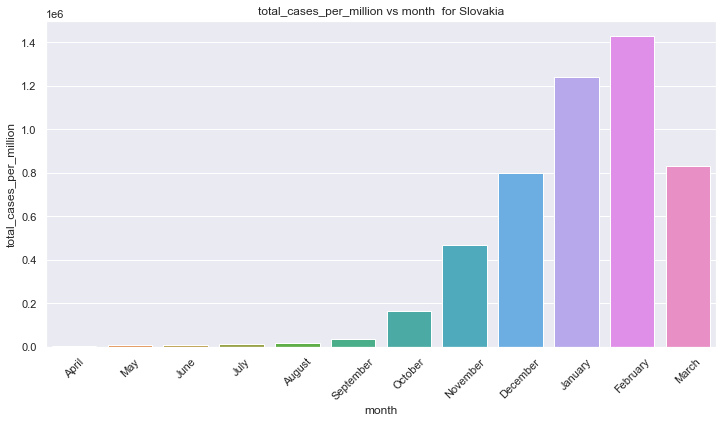

In [80]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases_per_million vs month  for Slovakia")

## 6. bar_plot showing the number of new_cases_per_million for each month

Text(0.5, 1.0, 'new_cases_per_million vs month  for Slovakia')

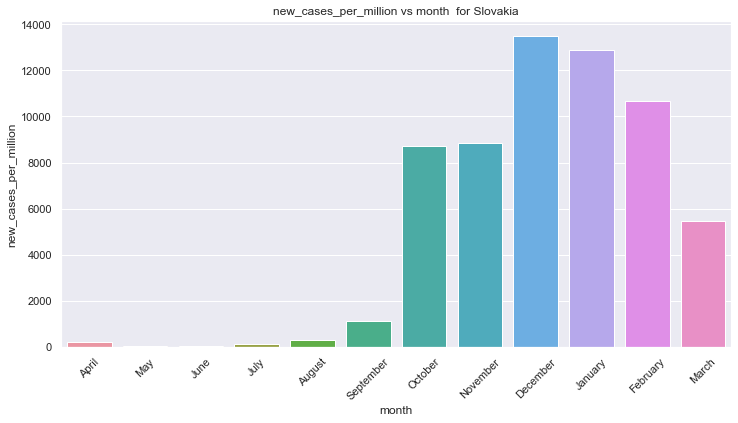

In [81]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_per_million vs month  for Slovakia")

## 7. bar_plot showing the number of total_deaths_per_million for each month

Text(0.5, 1.0, 'total_deaths_per_million vs month  for Slovakia')

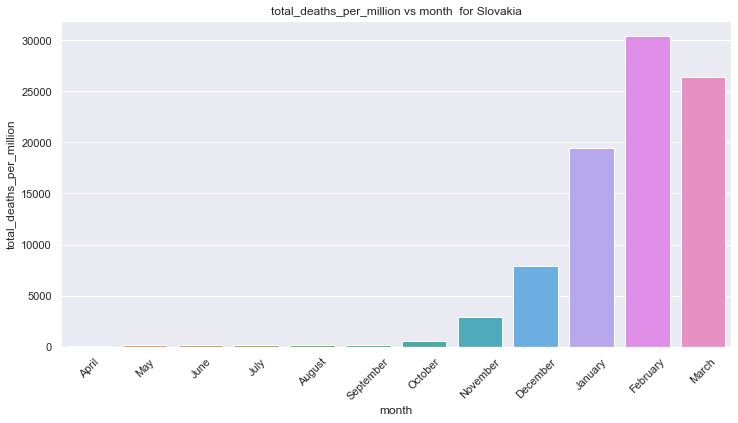

In [82]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths_per_million vs month  for Slovakia")

## 8. bar_plot showing the number of total_tests for each month

Text(0.5, 1.0, 'total_tests vs month  for Slovakia')

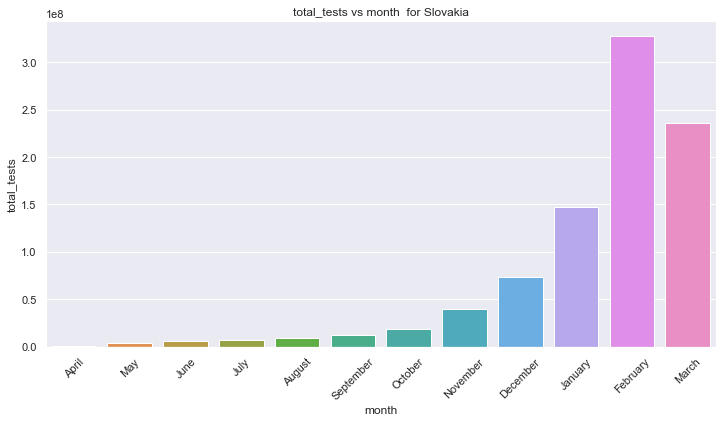

In [83]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_tests,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_tests vs month  for Slovakia")

## 9. bar_plot showing the number of positive_rate for each month

Text(0.5, 1.0, 'positive_rate vs month  for Slovakia')

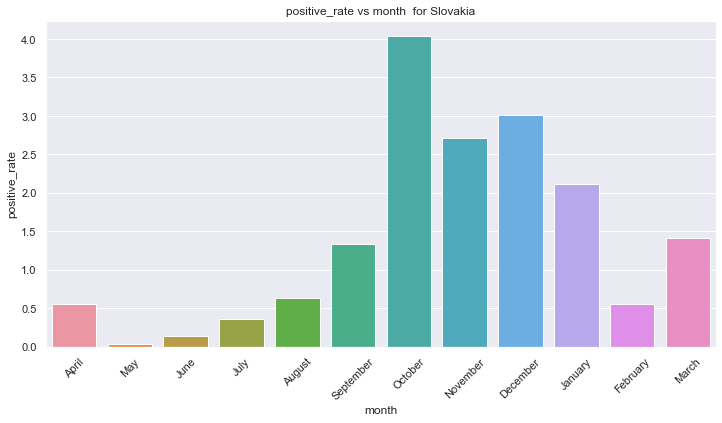

In [84]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.positive_rate,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("positive_rate vs month  for Slovakia")

## 10. bar_plot showing the number of stringency_index for each month

Text(0.5, 1.0, 'stringency_index vs month for Slovakia')

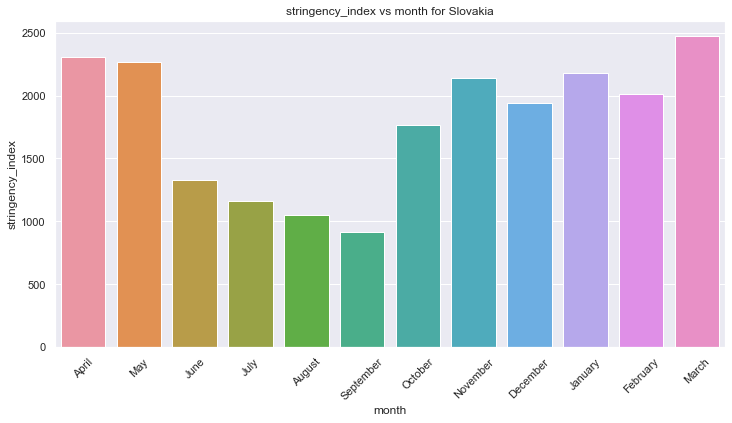

In [85]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.stringency_index,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("stringency_index vs month for Slovakia")

# SIR model

## For the epidemical mathematical model, basic models that are based on compartments, as shown in the following, were used:

### 1.(Susceptible->Infectible) SI model,

### 2.(Susceptible->Infectible-> Susceptible) SIS model,

### 3.(Susceptible->Infectible-> Recovery/Removed) SIR model.

## So we will only be studying about the SIR model 

   ### In 1927, Kermack and McKendrick first proposed a class of compartmental models that simplified the mathematical modeling of infectious disease transmission. The SIR model is a set of general equations that explain the dynamics of an infectious disease spreading through a susceptible population.The SIR model is a basic model of an infectious disease outbreak in a large population.The population is believed to be made up of three groups of people, whose numbers are denoted by the letters S, I, and R. (which is why this is called an SIR model). All of these are time functions that change according to a system of differential equations

### Susceptible S(t) is used to represent the individuals not yet infected with the disease at time t, or those susceptible to the disease of the population.

### Infected I(t) denotes the individuals of the population who have been infected with the disease and are capable of spreading the disease to those in the susceptible category. infected represents the new_cases in our dataset

### Recovered R(t) is the compartment used for the individuals of the population who have been infected and then removed from the disease, either due to immunization or due to death. Those in this category are not able to be infected again or to transmit the infection to others

# Implementing the following differential equations

## 1. Susceptible : dS/dt = −(β/N)SI or S′(t) = − [β ⋅ I(t) ⋅ S(t) / N]

## 2. Infected : dI/dt = (β/N)SI−γI or I′(t) = + [β ⋅ I(t) ⋅ S(t) / N] − [γ ⋅ I(t)]

## 3. Removed : dR/dt = γI or R′(t) = + [γ ⋅ I(t)]

## Here, N=S+I+R or N(t) = S(t)+I(t)+R(t) is independent of time t and denotes the total population size 

# Defining the SIR parameters as follows
### ● β (beta) : Expected amount of people an infected person infects per day. β is the transmission rate constant.
### ● D : Number of days an infected person has and can spread the disease
### ● γ (gamma) : The proportion of infected removed per day (γ = 1/D). γ the removal rate constant.
### ● R0 : The total number of people an infected person infects (R0 = β/γ)
### ● β (beta) and γ (gamma) are real, positive, parameters of the initial exponential growth and final exponential decay of the infected population I.

# Importing the required libraries!

In [86]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import odeint

In [87]:
Slovakia.head()

iso_code continent  location       date  total_cases  new_cases  \
0      SVK    Europe  Slovakia 2020-03-06          1.0        1.0   
1      SVK    Europe  Slovakia 2020-03-07          1.0        0.0   
2      SVK    Europe  Slovakia 2020-03-08          3.0        2.0   
3      SVK    Europe  Slovakia 2020-03-09          3.0        0.0   
4      SVK    Europe  Slovakia 2020-03-10          7.0        4.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0          897.614409   1290.652299   24.505747            22.323672  ...   
1          897.614409   1290.652299   24.505747            22.323672  ...   
2          897.614409   1290.652299   24.505747            22.323672  ...   
3          897.614409   1290.652299   24.505747            22.323672  ...   
4          897.614409   1290.652299   24.505747            22.323672  ...   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              0.7                287.959                 7.29   
1              0.7                287.959                 7.29   
2              0.7                287.959                 7.29   
3              0.7                287.959                 7.29   
4              0.7                287.959                 7.29   

   female_smokers  male_smokers  hospital_beds_per_thousand  life_expectancy  \
0            23.1          37.7                        5.82            77.54   
1            23.1          37.7                        5.82            77.54   
2            23.1          37.7                        5.82            77.54   
3            23.1          37.7                        5.82            77.54   
4            23.1          37.7                        5.82            77.54   

   human_development_index  recovered_cases  month  
0                     0.86     76485.738506  March  
1                     0.86     76485.738506  March  
2                     0.86     76485.738506  March  
3                     0.86     76485.738506  March  
4                     0.86     76485.738506  March  

[5 rows x 54 columns]

In [88]:
Slovakia.tail()

iso_code continent  location       date  total_cases  new_cases  \
369      SVK    Europe  Slovakia 2021-03-10     329593.0     3600.0   
370      SVK    Europe  Slovakia 2021-03-11     331571.0     1978.0   
371      SVK    Europe  Slovakia 2021-03-12     333872.0     2301.0   
372      SVK    Europe  Slovakia 2021-03-13     336235.0     2363.0   
373      SVK    Europe  Slovakia 2021-03-14     337503.0     1268.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
369            2176.286        8146.0       109.0               93.857  ...   
370            2058.857        8244.0        98.0               97.714  ...   
371            2041.429        8346.0       102.0               97.286  ...   
372            2018.714        8440.0        94.0              100.143  ...   
373            2016.143        8528.0        88.0               98.857  ...   

     extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
369              0.7                287.959                 7.29   
370              0.7                287.959                 7.29   
371              0.7                287.959                 7.29   
372              0.7                287.959                 7.29   
373              0.7                287.959                 7.29   

     female_smokers  male_smokers  hospital_beds_per_thousand  \
369            23.1          37.7                        5.82   
370            23.1          37.7                        5.82   
371            23.1          37.7                        5.82   
372            23.1          37.7                        5.82   
373            23.1          37.7                        5.82   

     life_expectancy  human_development_index  recovered_cases  month  
369            77.54                     0.86         317847.0  March  
370            77.54                     0.86         321349.0  March  
371            77.54                     0.86         323225.0  March  
372            77.54                     0.86         325432.0  March  
373            77.54                     0.86         327707.0  March  

[5 rows x 54 columns]

### As we can see from the dataframe, the covid has started on 06/03/2020 in country Slovakia
### The total population in the country Slovakia is found below. 

In [89]:
N = Slovakia.population[0]
N

5459643.0

### Hence the total population is 5459643. hence N = 5459643

### Now, we will be finding the mean value of the reproduction rate

In [90]:
mean_r0= Slovakia['reproduction_rate'].mean()
mean_r0

1.1303888888888878

In [91]:
for i in Slovakia['total_cases']:
    if i>0:
        break
i

1.0

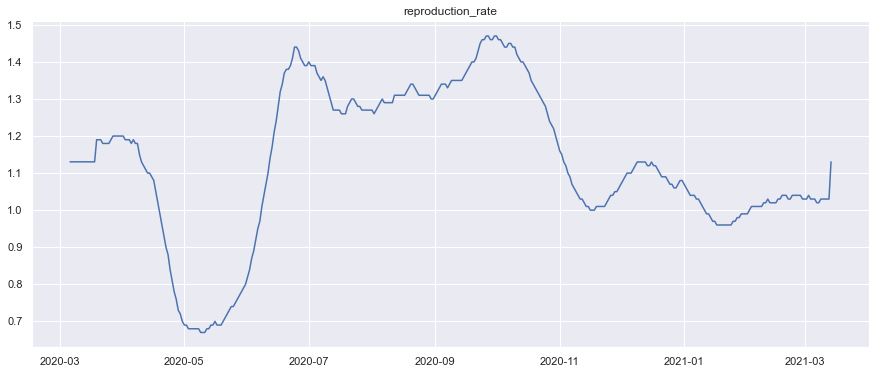

In [92]:
plt.figure(figsize=(15,6))
plt.plot(Slovakia['date'],Slovakia['reproduction_rate'])
plt.title('reproduction_rate')
plt.tick_params(axis='x', rotation=0)

As we can see from the above lineplot, the reproduction rate was increasing initially in the month of march-april and it decreased completely in month of may and it gradually increased till month of july

## As per the given condition, we willl be dividing our model into 4 different periods,

## As the conditions mentioned above, we will now find the number of days per each period

## So, we can find the number of days from above data. 

##  Now we need to find the mean value of reproduction [r0]  rate for each period

In [93]:
r0_period1= Slovakia['reproduction_rate'][0:44].mean()
r0_period2= Slovakia['reproduction_rate'][0:112].mean()
r0_period3= Slovakia['reproduction_rate'][43:112].mean()
r0_period4= Slovakia['reproduction_rate'][262:].mean()

print(r0_period1, r0_period2, r0_period3, r0_period4)

1.1505694444444439 0.9962951388888888 0.8982608695652176 1.039289186507937


## Defining the differential equation for the SIR model

In [94]:
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -(beta * s * i)/N
    didt = +(beta * s * i)/N - [gamma * i]          
    drdt = +gamma * i
    return [dsdt, didt, drdt]

## Implementing the model for Period 1 and for Period 2

In [95]:
# For period 1

R0_p1 = r0_period1

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial1 = i
r_initial1 = 0.00
s_initial1 = N - i_initial1 - r_initial1 

gamma = 1/t_infective
beta1 = R0_p1

# For period 2
R0_p2 = r0_period2

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial2 = i
r_initial2 = 0.00
s_initial2 = N - i_initial2 - r_initial2

gamma = 1/t_infective
beta2 = R0_p2

In [96]:
t1 = np.linspace(0, 43, 43)  # Grid of time points (in days)
x_initial1 = s_initial1, i_initial1, r_initial1
soln1 = odeint(deriv, x_initial1, t1, args=(beta1, gamma))
s1, i1, r1 = soln1.T
e = None

t2 = np.linspace(0, 112, 112)  # Grid of time points (in days)
x_initial2 = s_initial2, i_initial2, r_initial2
soln2 = odeint(deriv, x_initial2, t2, args=(beta2, gamma))
s2, i2, r2 = soln2.T
e = None

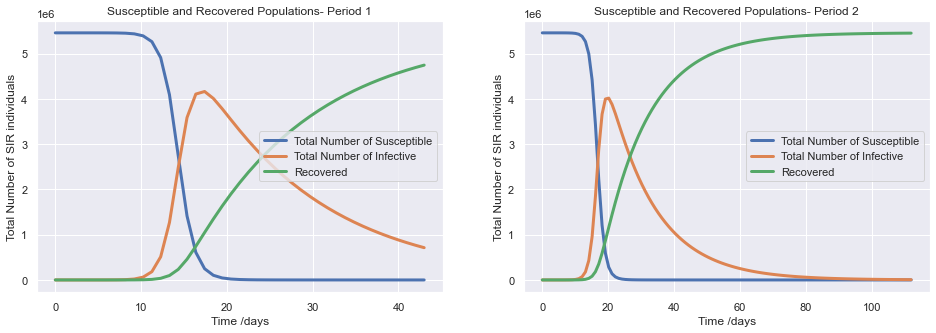

In [97]:
fig= plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t1, s1, lw=3, label='Total Number of Susceptible')
ax1.plot(t1, i1, lw=3, label='Total Number of Infective')
ax1.plot(t1, r1, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations- Period 1')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Total Number of SIR individuals')
ax1.legend(loc='center right')

ax2.plot(t2, s2, lw=3, label='Total Number of Susceptible')
ax2.plot(t2, i2, lw=3, label='Total Number of Infective')
ax2.plot(t2, r2, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 2')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Total Number of SIR individuals')
ax2.legend(loc='center right')


fig.set_figheight(5)
fig.set_figwidth(16)

plt.show()

## As we can find out the active cases using the formula as
### Active Cases = [Total_Cases] - [total_cases_shifted]

In [98]:
Slovakia['total_cases_shifted']= Slovakia.total_cases.shift(14)
Slovakia['active_cases_calc']= Slovakia['total_cases']-Slovakia['total_cases_shifted']
Slovakia['susceptible']= Slovakia['population']-Slovakia['total_cases']

# Implementing the model for Period 3 and for Period 4

In [99]:
# For period 3
R0_p3 = r0_period3

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial3= Slovakia.loc[43, 'active_cases_calc']/N
r_initial3= (N-Slovakia.loc[43, 'total_cases'])/N
s_initial3= N-i_initial3-r_initial3

gamma = 1/t_infective
beta3 = R0_p3

# For period 4
R0_p4 = r0_period4

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial4= Slovakia.loc[224, 'active_cases_calc']/N
r_initial4= (N-Slovakia.loc[224, 'total_cases'])/N
s_initial4= N-i_initial4-r_initial4

gamma = 1/t_infective
beta4 = R0_p4

In [100]:
t3 = np.linspace(0, 69, 69)  # Grid of time points (in days)
x_initial3 = s_initial3, i_initial3, r_initial3
soln3 = odeint(deriv, x_initial3, t3, args=(beta3, gamma))
s3, i3, r3 = soln3.T
e = None

t4 = np.linspace(0, 189, 189)  # Grid of time points (in days)
x_initial4 = s_initial4, i_initial4, r_initial4
soln4 = odeint(deriv, x_initial4, t4, args=(beta4, gamma))
s4, i4, r4 = soln4.T
e = None

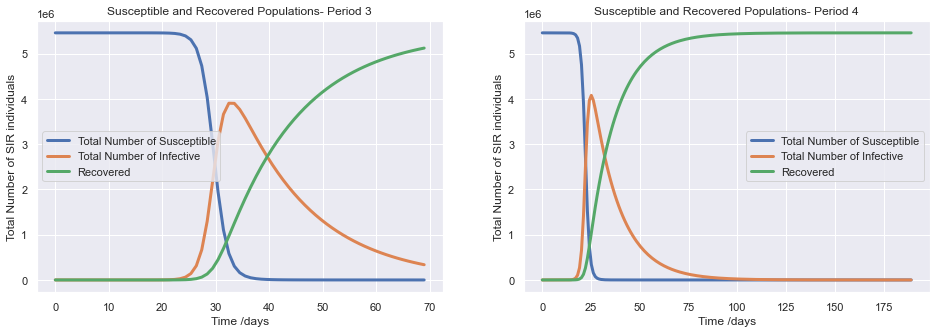

In [101]:
fig= plt.figure()
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

ax3.plot(t3, s3, lw=3, label='Total Number of Susceptible')
ax3.plot(t3, i3, lw=3, label='Total Number of Infective')
ax3.plot(t3, r3, lw=3, label='Recovered')
ax3.set_title('Susceptible and Recovered Populations- Period 3')
ax3.set_xlabel('Time /days')
ax3.set_ylabel('Total Number of SIR individuals')
ax3.legend()

ax4.plot(t4, s4, lw=3, label='Total Number of Susceptible')
ax4.plot(t4, i4, lw=3, label='Total Number of Infective')
ax4.plot(t4, r4, lw=3, label='Recovered')
ax4.set_title('Susceptible and Recovered Populations- Period 4')
ax4.set_xlabel('Time /days')
ax4.set_ylabel('Total Number of SIR individuals')
ax4.legend()

fig.set_figheight(5)
fig.set_figwidth(16)

plt.show()


## Implementing all the models by taking beta value as the mean of reproduction rate 

In [102]:
r0= Slovakia['reproduction_rate'].mean()

# For period 1
R0_p1 = r0

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial1 = i
r_initial1 = 0.00
s_initial1 = N - i_initial1 - r_initial1 

gamma = 1/t_infective
beta1 = R0_p1

# For period 2
R0_p2 = r0

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial2 = i
r_initial2 = 0.00
s_initial2 = N - i_initial2 - r_initial2

gamma = 1/t_infective
beta2 = R0_p2


# For period 3
R0 = r0

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial3= Slovakia.loc[43, 'active_cases_calc']/N
r_initial3= (N-Slovakia.loc[43, 'total_cases'])/N
s_initial3= N-i_initial3-r_initial3

gamma = 1/t_infective
beta3 = R0

# For period 4
R0_p4 = r0

#t_infectious= 5,t_incubation= 3.3
t_infective = 14

# initial number of infected and recovered individuals
i_initial4= Slovakia.loc[262, 'active_cases_calc']/N
r_initial4= (N-Slovakia.loc[262, 'total_cases'])/N
s_initial4= N-i_initial4-r_initial4

gamma = 1/t_infective
beta4 = R0_p4

In [103]:
t1 = np.linspace(0, 43, 43)  # Grid of time points (in days)
x_initial1 = s_initial1, i_initial1, r_initial1
soln1 = odeint(deriv, x_initial1, t1, args=(beta1, gamma))
s1, i1, r1 = soln1.T
e = None

t2 = np.linspace(0, 111, 112)  # Grid of time points (in days)
x_initial2 = s_initial2, i_initial2, r_initial2
soln2 = odeint(deriv, x_initial2, t2, args=(beta2, gamma))
s2, i2, r2 = soln2.T
e = None

t3 = np.linspace(0, 68, 68)  # Grid of time points (in days)
x_initial3 = s_initial3, i_initial3, r_initial3
soln3 = odeint(deriv, x_initial3, t3, args=(beta3, gamma))
s3, i3, r3 = soln3.T
e = None

t4 = np.linspace(0, 189, 189)  # Grid of time points (in days)
x_initial4 = s_initial4, i_initial4, r_initial4
soln4 = odeint(deriv, x_initial4, t4, args=(beta4, gamma))
s4, i4, r4 = soln4.T
e = None

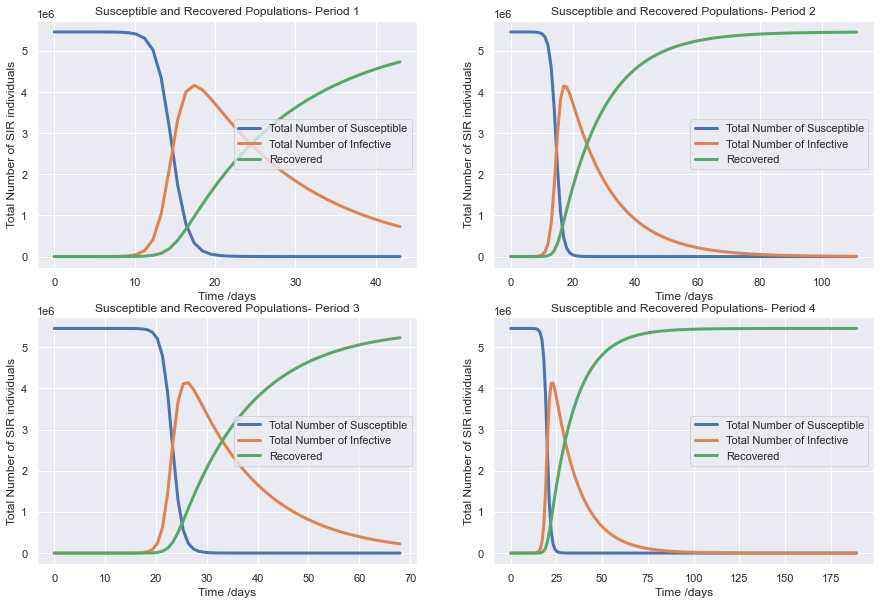

In [104]:
fig= plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(t1, s1, lw=3, label='Total Number of Susceptible')
ax1.plot(t1, i1, lw=3, label='Total Number of Infective')
ax1.plot(t1, r1, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations- Period 1')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Total Number of SIR individuals')
ax1.legend(loc='center right')

ax2.plot(t2, s2, lw=3, label='Total Number of Susceptible')
ax2.plot(t2, i2, lw=3, label='Total Number of Infective')
ax2.plot(t2, r2, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 2')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Total Number of SIR individuals')
ax2.legend(loc='center right')


ax3.plot(t3, s3, lw=3, label='Total Number of Susceptible')
ax3.plot(t3, i3, lw=3, label='Total Number of Infective')
ax3.plot(t3, r3, lw=3, label='Recovered')
ax3.set_title('Susceptible and Recovered Populations- Period 3')
ax3.set_xlabel('Time /days')
ax3.set_ylabel('Total Number of SIR individuals')
ax3.legend()

ax4.plot(t4, s4, lw=3, label='Total Number of Susceptible')
ax4.plot(t4, i4, lw=3, label='Total Number of Infective')
ax4.plot(t4, r4, lw=3, label='Recovered')
ax4.set_title('Susceptible and Recovered Populations- Period 4')
ax4.set_xlabel('Time /days')
ax4.set_ylabel('Total Number of SIR individuals')
ax4.legend()

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

Text(0.5, 0, 'days')

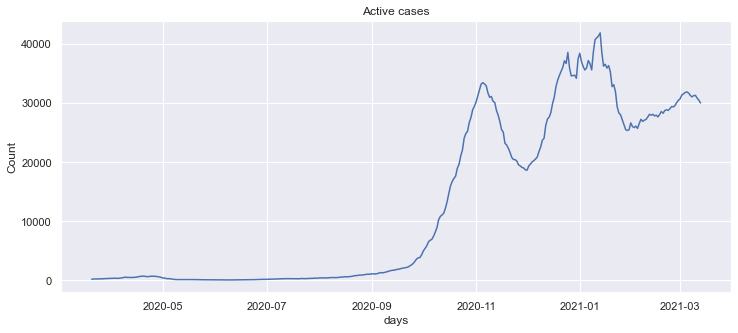

In [105]:
Slovakia['total_cases_shifted']= Slovakia.total_cases.shift(14)
Slovakia['active_cases_calc']= Slovakia['total_cases']-Slovakia['total_cases_shifted']
#Slovakia['susceptible']= Slovakia['population']-Slovakia['total_cases']
plt.figure(figsize=(12,5))
plt.plot(Slovakia.date[0:373],Slovakia['active_cases_calc'][0:373])
plt.title('Active cases')
plt.ylabel('Count')
plt.xlabel('days')


## Calculating the Accuracy of Predicted cases and Actual Case  

In [108]:
d1 = {'actual':list(Slovakia['active_cases_calc'][14:57]),'predicted': list(i1) }
result1 = pd.DataFrame(data=d1)

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

result1[['actual','predicted']]= scaler1.fit_transform(result1[['actual','predicted']])

## Period 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
result1[['actual','predicted']]= scaler1.fit_transform(result1[['actual','predicted']])

Mean absolute error: 0.32
Residual sum of squares (MSE): 0.15
 R2 score -0.44577772831246776


Text(0.5, 1.0, 'comparison')

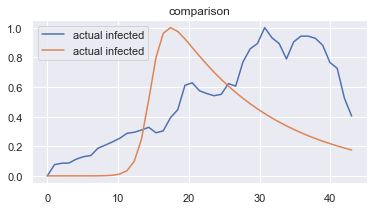

In [110]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(result1.predicted - result1.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result1.predicted - result1.actual) ** 2))
print(" R2 score",r2_score(result1.predicted,result1.actual))
plt.plot(t1,result1.actual, label='actual infected')
plt.plot(t1,result1.predicted, label='actual infected')
plt.legend()
plt.title('comparison')

## Period 2

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.07
 R2 score 0.005536840273477894


Text(0.5, 1.0, 'comparison')

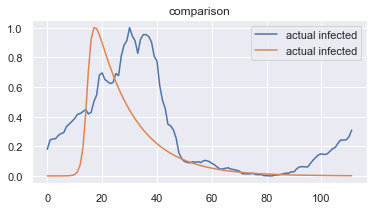

In [115]:
d2 = {'actual':list(Slovakia['active_cases_calc'][14:126]),'predicted': list(i2) }
result2 = pd.DataFrame(data=d2)

scaler2 = MinMaxScaler()
result2[['actual','predicted']]= scaler2.fit_transform(result2[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result2.predicted - result2.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result2.predicted - result2.actual) ** 2))
print(" R2 score",r2_score(result2.predicted,result2.actual))

plt.plot(t2,result2.actual, label='actual infected')
plt.plot(t2,result2.predicted, label='actual infected')
plt.legend()
plt.title('comparison')

68

## Period 3

Mean absolute error: 0.37
Residual sum of squares (MSE): 0.21
 R2 score -1.3467658211698947


Text(0.5, 1.0, 'comparison')

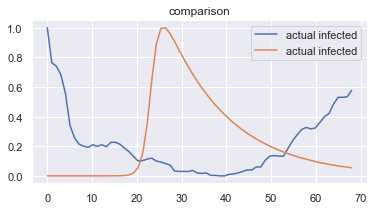

In [122]:
d3= {'actual':list(Slovakia['active_cases_calc'][57:125]),'predicted': list(i3) }
result3 = pd.DataFrame(data=d3)
scaler3 = MinMaxScaler()
result3[['actual','predicted']]= scaler3.fit_transform(result3[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result3.predicted - result3.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result3.predicted - result3.actual) ** 2))
print(" R2 score",r2_score(result3.predicted,result3.actual))
plt.plot(t3,result3.actual, label='actual infected')
plt.plot(t3,result3.predicted, label='actual infected')
plt.legend()
plt.title('comparison')

## Period 4

Mean absolute error: 0.57
Residual sum of squares (MSE): 0.39
 R2 score -7.405459001175609


Text(0.5, 1.0, 'comparison')

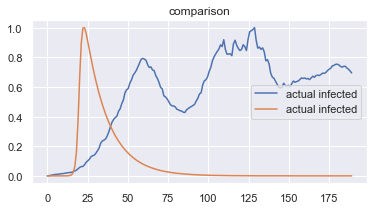

In [128]:
d4= {'actual':list(Slovakia['active_cases_calc'][185:]),'predicted': list(i4) }
result4 = pd.DataFrame(data=d4)
scaler4 = MinMaxScaler()
result4[['actual','predicted']]= scaler4.fit_transform(result4[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result4.predicted - result4.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result4.predicted - result4.actual) ** 2))
print(" R2 score",r2_score(result4.predicted,result4.actual))
plt.plot(t4,result4.actual, label='actual infected')
plt.plot(t4,result4.predicted, label='actual infected')
plt.legend()
plt.title('comparison')

# Conclusion 

## This complete notebook represents an exploratory data analysis (EDA) process to put together the patterns related to the current COIVD-19 pandemic. We have dealt with the covid data "linear-comprehensive-covid-data" and grouped only a single country Slovakia. The purpose of this study is to analyze the dataset and obtain important insights form it. As visual representations are flexible and easy to understand, the results or outputs produced in the form of graphs can help people comprehend the current situation insights easily. The dataset used may not be an updated version; hence the inferences may vary from time to time as graphs can be generated as the data increases. As the amount of data increases, the trends may change and lead to different inferences and solutions.

# Reference

### https://en.wikipedia.org/wiki/Exploratory_data_analysis

### https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9

### https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9

### https://ieeexplore.ieee.org/document/9225621